In [1]:
import EOSutils as meos

import numpy as np
import matplotlib.pyplot as plt

import matplotlib.style
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cmx
from mpl_toolkits.axes_grid1 import make_axes_locatable

mpl.style.use('classic')

from astropy.table import Table
from astropy import units as u
from astropy.constants import G

import mesa_helper as mh
import os
import shutil
import copy

from scipy import interpolate
from scipy.linalg import lstsq as scipy_lstsq
from scipy.ndimage import gaussian_filter
import scipy.integrate as integrate
import decimal 

%matplotlib inline

/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:714: UserWarning: The following kwargs were not used by contour: 'shading'
  cs00 = axes[0].contourf(plot_rho, plot_T, np.log10(plot_P), shading='nearest', cmap='magma', levels=np.linspace(0,30,20))
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:719: UserWarning: The following kwargs were not used by contour: 'shading'
  cs01 = axes[1].contourf(plot_rho, plot_T, np.log10(plot_S), shading='nearest', cmap='magma',levels=np.linspace(6,10,20))
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:724: UserWarning: The following kwargs were not used by contour: 'shading'
  cs02 = axes[2].contourf(plot_rho, plot_T, np.log10(plot_E), shading='nearest', cmap='magma',levels=np.linspace(9,20,20))


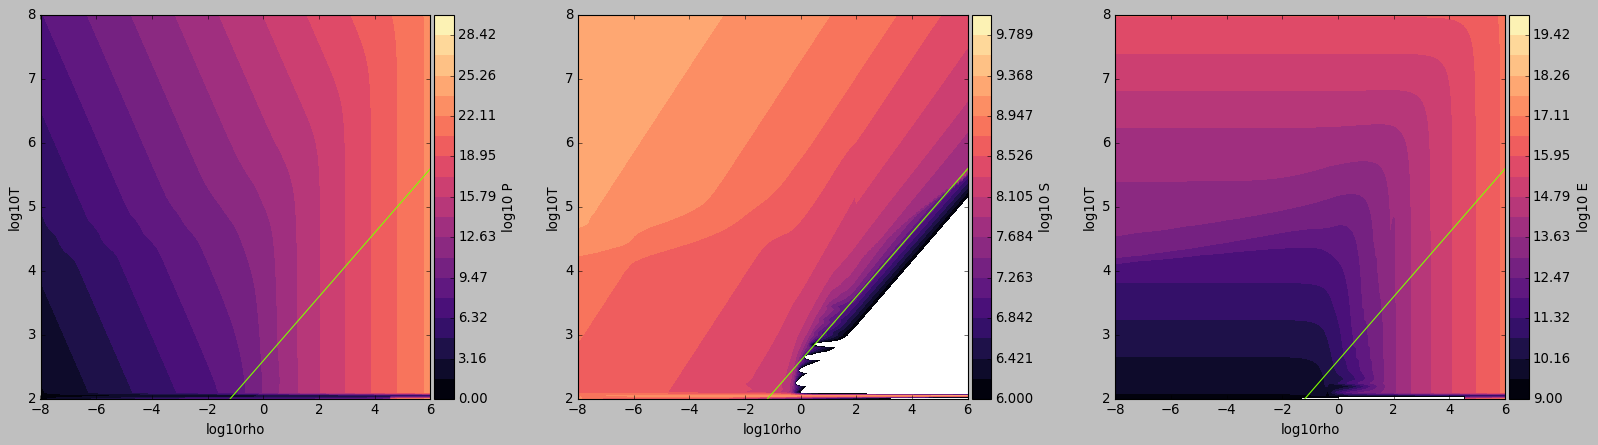

In [2]:
toy = meos.CMStable("../2021_chabrier+_tables/TABLE_HE_Trho_v1",units='cgs')
'''
boundary = 3.4 + 0.5*toy.log10rhogrid + np.log10(toy.atomic_number) - (5./3)*np.log10(toy.mass_number)
mask = (toy.log10Tgrid < boundary)
allowedMask = ~mask

toy.log10Pgrid = np.ma.array(toy.log10Pgrid, mask=~allowedMask, fill_value = np.nan)
toy.log10Sgrid = np.ma.array(toy.log10Sgrid, mask=~allowedMask, fill_value = np.nan)
toy.log10Ugrid = np.ma.array(toy.log10Ugrid, mask=~allowedMask, fill_value = np.nan)
'''

meos.plot_PSE(toy, 10**toy.log10Pgrid,10**toy.log10Sgrid,10**toy.log10Ugrid)

/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_81384/2438104570.py:1: RuntimeWarning: overflow encountered in power
  toy_F = 10**toy.log10Ugrid - ((10**toy.log10Tgrid) * (10**toy.log10Sgrid))
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_81384/2438104570.py:1: RuntimeWarning: invalid value encountered in subtract
  toy_F = 10**toy.log10Ugrid - ((10**toy.log10Tgrid) * (10**toy.log10Sgrid))
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_81384/2438104570.py:8: RuntimeWarning: invalid value encountered in log10
  zs=[np.log10(toy_F),np.log10(-1*toy_F)],


nan
nan


/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:814: UserWarning: The following kwargs were not used by contour: 'shading'
  cs = axes[i,j].contourf(xs[i*nCol + j], ys[i*nCol + j], zs[i*nCol + j], shading='nearest', cmap=cmap[i*nCol + j], levels=np.linspace(zlims[i*nCol+j][0],zlims[i*nCol+j][1],levels[i*nCol+j]))


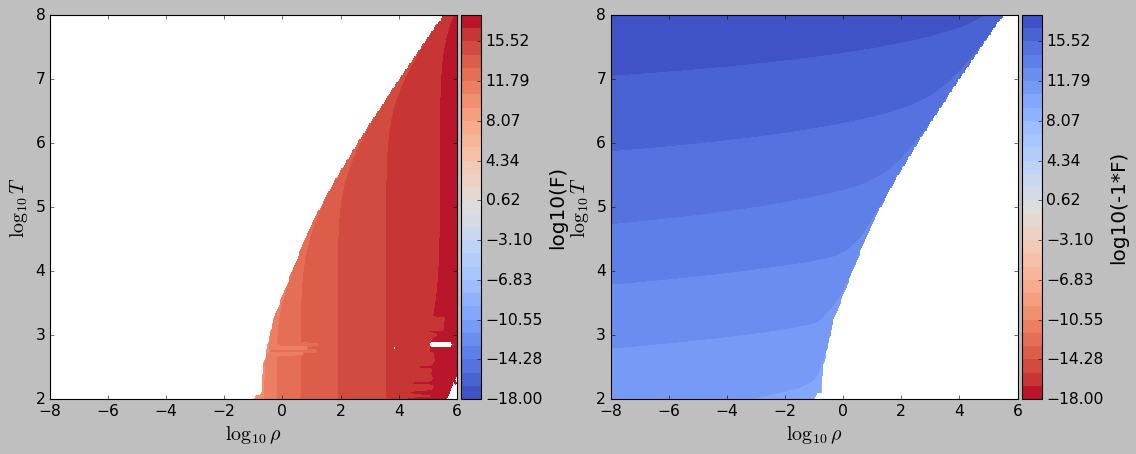

In [3]:
toy_F = 10**toy.log10Ugrid - ((10**toy.log10Tgrid) * (10**toy.log10Sgrid))
print(np.min(toy_F))
print(np.max(toy_F))

meos.contourf_sublots_with_colorbars(nRow=1, nCol=2, 
                                xs=[toy.log10rhogrid,toy.log10rhogrid],
                                ys=[toy.log10Tgrid,toy.log10Tgrid],
                                zs=[np.log10(toy_F),np.log10(-1*toy_F)],
                                xlims=[(-8,6),(-8,6)], 
                                ylims=[(2,8),(2,8)], 
                                zlims=[(-18,18),(-18,18)],
                                levels=[30,30], 
                                xlabels=[r'$\log_{10}\rho$',r'$\log_{10}\rho$'],
                                ylabels=[r'$\log_{10}T$',r'$\log_{10}T$'],
                                zlabels=['log10(F)','log10(-1*F)'],
                                cmap=['coolwarm','coolwarm_r'], vlines=None, hlines=None, otherlines_x=None, otherlines_y=None, savename=None)


In [4]:
dF_drho_T, dF_dT_rho = meos.finite_difference_single_grid(grid = toy_F, log10rhogrid = toy.log10rhogrid, log10Tgrid = toy.log10Tgrid)
'''
boundary = 3.51 + 0.5*toy.log10rhogrid + np.log10(toy.atomic_number) - (5./3)*np.log10(toy.mass_number)
mask = (toy.log10Tgrid < boundary) 
allowedMask = ~mask
 

dF_drho_T = np.ma.array(dF_drho_T, mask=~allowedMask, fill_value = np.nan)
dF_dT_rho = np.ma.array(dF_dT_rho, mask=~allowedMask, fill_value = np.nan)
'''
print(np.min(dF_drho_T),np.max(dF_drho_T))
print(np.min(dF_dT_rho),np.max(dF_dT_rho))


nan nan
nan nan


/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_81384/2018078439.py:4: RuntimeWarning: invalid value encountered in log10
  zs=[np.log10(dF_drho_T), np.log10(-dF_dT_rho)],


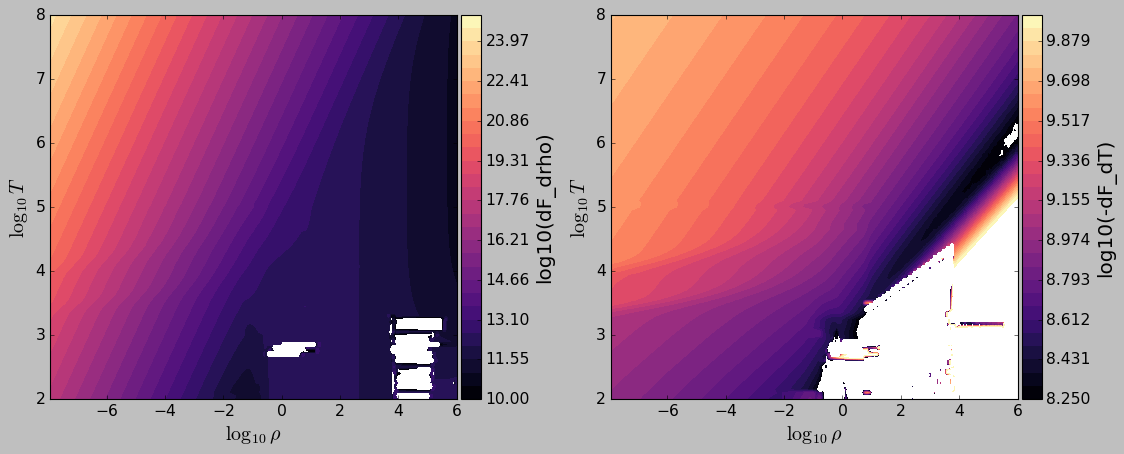

In [5]:
meos.contourf_sublots_with_colorbars(nRow=1, nCol=2, 
                                xs=[toy.log10rhogrid,toy.log10rhogrid],
                                ys=[toy.log10Tgrid,toy.log10Tgrid],
                                zs=[np.log10(dF_drho_T), np.log10(-dF_dT_rho)],
                                #zs=[F_toy],
                                xlims=[(-7.95,6),(-7.95,6)], 
                                ylims=[(2,8),(2,8)], 
                                zlims=[(10,25),(8.25,10)],
                                levels=[30,30], 
                                xlabels=[r'$\log_{10}\rho$',r'$\log_{10}\rho$'],
                                ylabels=[r'$\log_{10}T$',r'$\log_{10}T$'],
                                zlabels=['log10(dF_drho)','log10(-dF_dT)'],
                                cmap='magma', vlines=None, hlines=None, otherlines_x=None, otherlines_y=None, savename=None)

/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:714: RuntimeWarning: invalid value encountered in log10
  cs00 = axes[0].contourf(plot_rho, plot_T, np.log10(plot_P), shading='nearest', cmap='magma', levels=np.linspace(0,30,20))
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:719: RuntimeWarning: invalid value encountered in log10
  cs01 = axes[1].contourf(plot_rho, plot_T, np.log10(plot_S), shading='nearest', cmap='magma',levels=np.linspace(6,10,20))
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:724: RuntimeWarning: invalid value encountered in log10
  cs02 = axes[2].contourf(plot_rho, plot_T, np.log10(plot_E), shading='nearest', cmap='magma',levels=np.linspace(9,20,20))


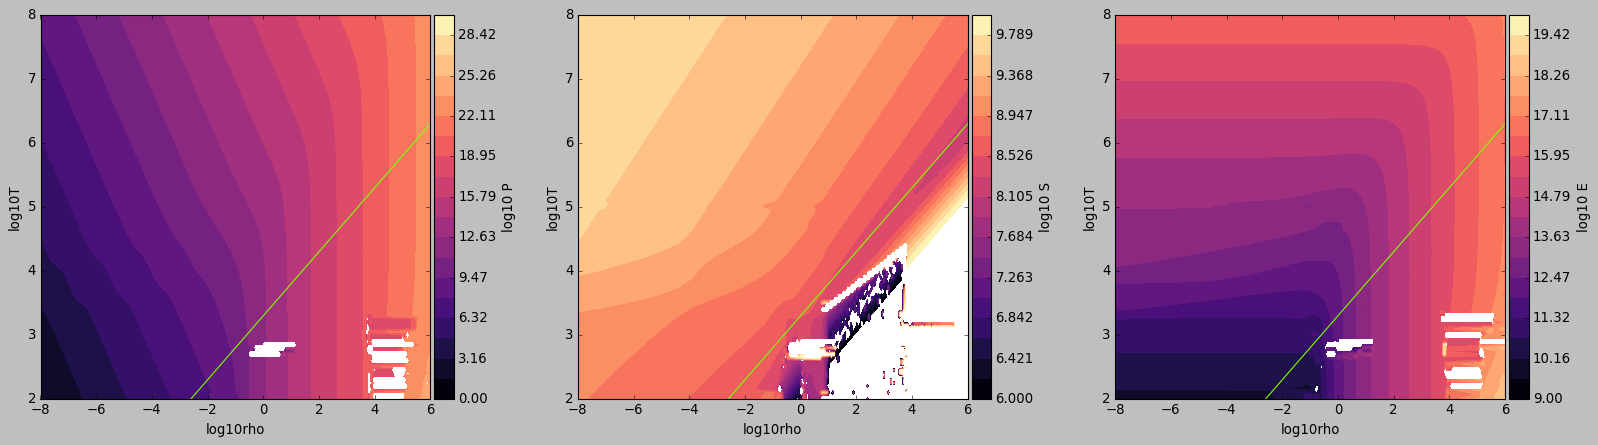

In [6]:
toy_P = (10**toy.log10rhogrid)**2 * dF_drho_T
toy_S = -1 * dF_dT_rho
toy_E = toy_F + (10**toy.log10Tgrid * toy_S)

meos.plot_PSE(toy, toy_P, toy_S, toy_E)

/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_81384/4122184934.py:1: RuntimeWarning: invalid value encountered in log10
  toy.log10Pgrid = np.log10(toy_P)
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_81384/4122184934.py:2: RuntimeWarning: invalid value encountered in log10
  toy.log10Sgrid = np.log10(toy_S)
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_81384/4122184934.py:3: RuntimeWarning: invalid value encountered in log10
  toy.log10Ugrid = np.log10(toy_E)


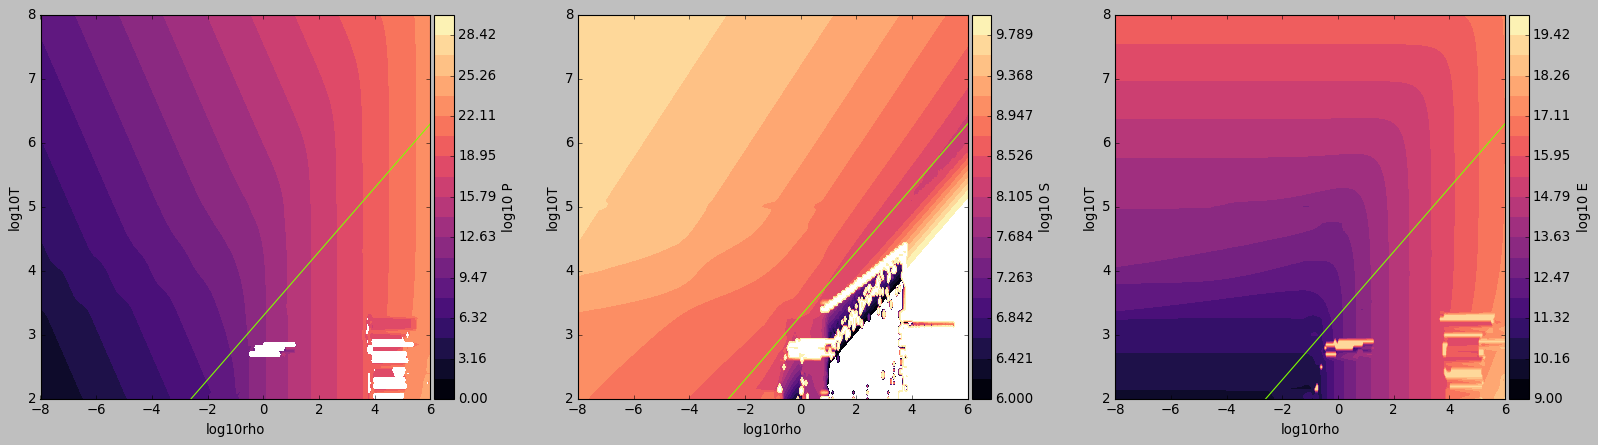

In [7]:
toy.log10Pgrid = np.log10(toy_P)
toy.log10Sgrid = np.log10(toy_S)
toy.log10Ugrid = np.log10(toy_E)
meos.plot_PSE(toy, 10**toy.log10Pgrid, 10**toy.log10Sgrid, 10**toy.log10Ugrid)

<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:19: SyntaxWarning: invalid escape sequence '\l'
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_83613/1492752127.py:19: SyntaxWarning: invalid escape sequence '\l'
  '''
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:946: RuntimeWarning: invalid value encountered in log10
  zs=[np.log10(dP_drho_T),np.log10(-1*dS_drho_T),np.log10(np.abs(dE_drho_T)),np.log10(dP_dT_rho),np.log10(dS_dT_rho),np.log10(dE_dT_rho)],
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:946: RuntimeWarning: divide by zero encountered in log10
  zs=[np.log10(dP_drho_T),np.log10(-1*dS_drho_T),np.log10(np.abs(dE_drho_T)),np.log10(dP_dT_rho),np.log10(dS_dT_rho),np.log10(dE_dT_rho)],
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:811: UserWarning: The following kwargs were not used by contour: 'shading'
  cs = axes[i,j].contourf(xs[i*nCol + j], ys[i*nCol +

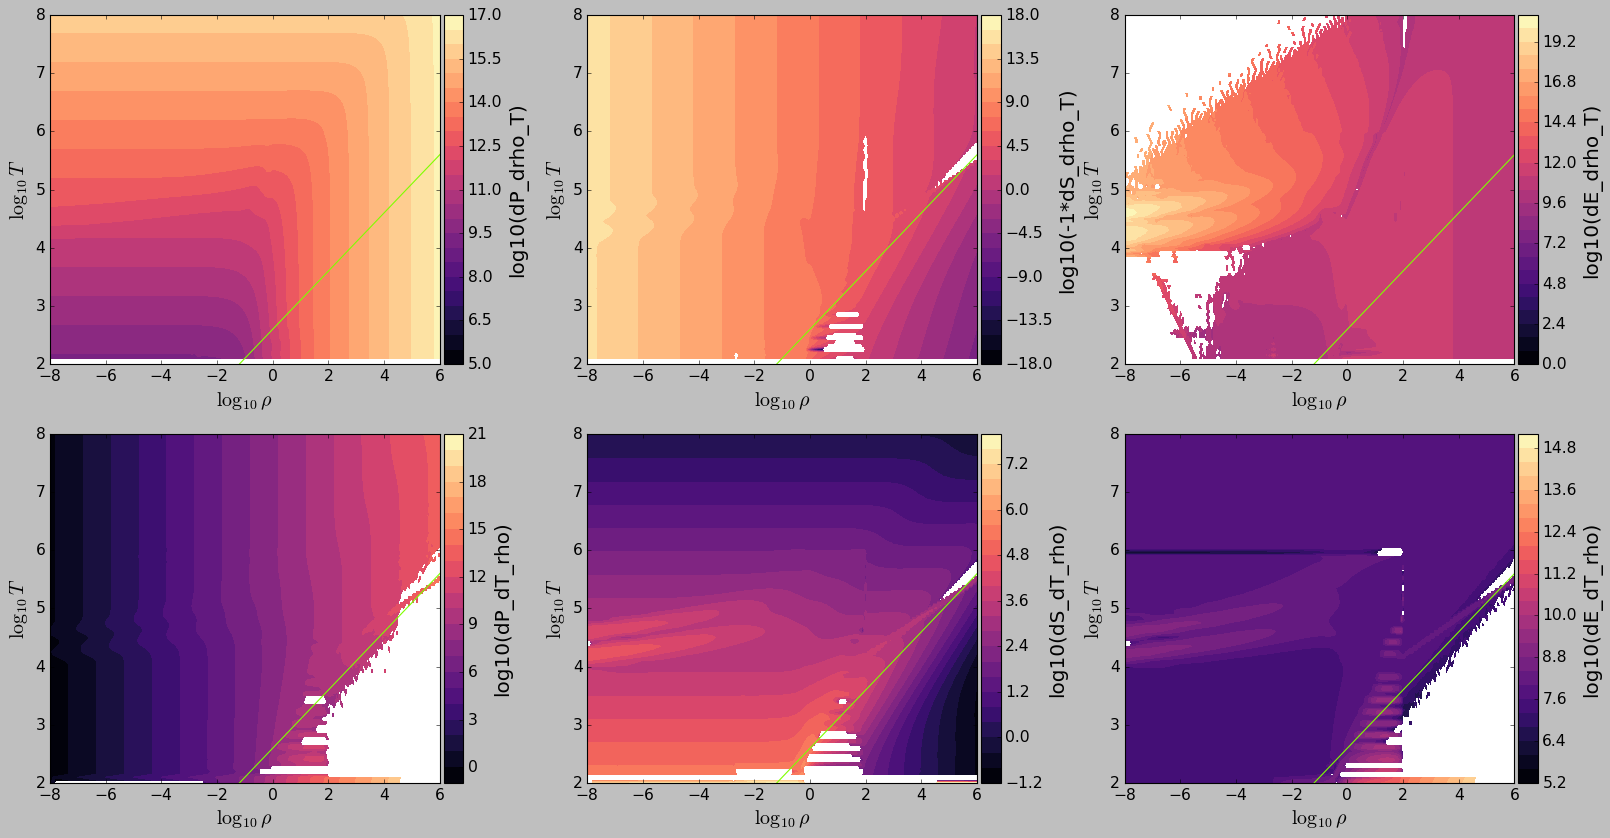

/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:814: UserWarning: The following kwargs were not used by contour: 'shading'
  cs = axes[i,j].contourf(xs[i*nCol + j], ys[i*nCol + j], zs[i*nCol + j], shading='nearest', cmap=cmap[i*nCol + j], levels=np.linspace(zlims[i*nCol+j][0],zlims[i*nCol+j][1],levels[i*nCol+j]))


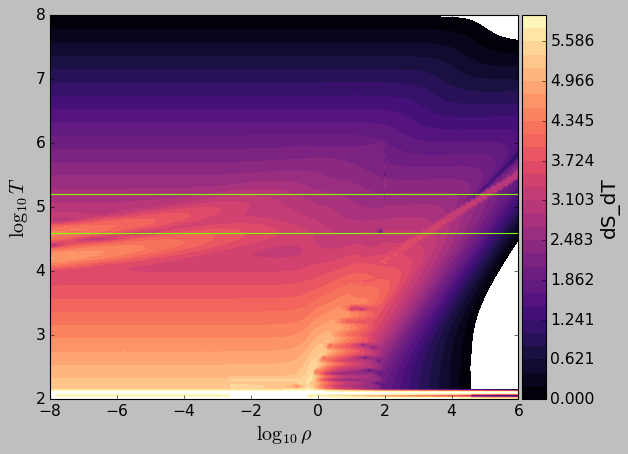

In [3]:
dP_drho, dS_drho, dE_drho, dP_dT, dS_dT, dE_dT =  meos.finite_difference(toy, 10**toy.log10Pgrid,10**toy.log10Sgrid,10**toy.log10Ugrid,
                                                                         species='H', maskUnphysicalRegion=False, plot=True, savename=None)

meos.contourf_sublots_with_colorbars(nRow=1, nCol=1, 
                                xs=[toy.log10rhogrid],
                                ys=[toy.log10Tgrid],
                                zs=[np.log10(np.abs(dS_dT))],
                                #zs=[F_toy],
                                xlims=[(-8,6)], 
                                ylims=[(2,8)], 
                                zlims=[(0,6)],
                                #zlims=[(-1.e18,1.e18)], 
                                levels=[30], 
                                xlabels=[r'$\log_{10}\rho$'],
                                ylabels=[r'$\log_{10}T$'],
                                zlabels=['dS_dT'],
                                cmap='magma', vlines=None, hlines=[4.6,5.2], otherlines_x=None, otherlines_y=None, savename=None)

'''
#interpolate to get rid of negative dS_dT values
rho = 10**toy.log10rhogrid
T = 10**toy.log10Tgrid

grid_rho = rho[:,0]
grid_T = T[0]

missing_T = np.concatenate((grid_T[:52],grid_T[65:]))

part1 = dS_dT[:,:52]
part2 = dS_dT[:,65:]
#print(np.shape(part1))
#print(np.shape(part2))
whole = np.vstack((part1.T,part2.T)).T
#print(np.shape(whole))

interp = interpolate.RegularGridInterpolator(points=(grid_rho, missing_T), values=whole, bounds_error=False, fill_value=None, method='linear')

dS_dT_interp = interp((10**toy.log10rhogrid, 10**toy.log10Tgrid))


boundary = 3.7 + 0.5*toy.log10rhogrid + np.log10(toy.atomic_number) - (5./3)*np.log10(toy.mass_number)
orig_was_better = (toy.log10Tgrid < boundary) | (toy.log10rhogrid > 1.95)
dS_dT_interp[orig_was_better] = dS_dT[orig_was_better]

mask = (toy.log10Tgrid < boundary) 
allowedMask = ~mask
 
dS_dT_interp = np.ma.array(dS_dT_interp, mask=~allowedMask, fill_value = np.nan)
meos.contourf_sublots_with_colorbars(nRow=1, nCol=1, 
                                xs=[toy.log10rhogrid],
                                ys=[toy.log10Tgrid],
                                zs=[np.log10(dS_dT_interp)],
                                #zs=[F_toy],
                                xlims=[(-8,6)], 
                                ylims=[(2,8)], 
                                zlims=[(0,6)],
                                #zlims=[(-1.e18,1.e18)], 
                                levels=[30], 
                                xlabels=[r'$\log_{10}\rho$'],
                                ylabels=[r'$\log_{10}T$'],
                                zlabels=['dS_dT'],
                                cmap='magma', vlines=None, hlines=[4.6,5.2], otherlines_x=None, otherlines_y=None, savename=None)
'''

#alternatively--just make these negative dS_dT values very small but positive
dS_dT_interp = copy.deepcopy(dS_dT)
dS_dT_interp[dS_dT <= 0] = np.min(dS_dT[dS_dT > 0.])

/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:1009: RuntimeWarning: divide by zero encountered in divide
  dse = (T * (dS_dT_rho/dE_dT_rho)) - 1
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:1010: RuntimeWarning: divide by zero encountered in divide
  dsp = (-1 * rho**2 * (dS_drho_T/dP_dT_rho)) - 1
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:1013: RuntimeWarning: invalid value encountered in multiply
  b = -1 * dE_dT_rho * dse
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:1014: RuntimeWarning: invalid value encountered in multiply
  c = (1/rho**2) * dP_dT_rho * dsp
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:1064: RuntimeWarning: divide by zero encountered in log10
  zs=[dpe, dse, dsp, np.log10(a),np.log10(b) ,np.log10(c),np.log10(-1*a),np.log10(-1*b) ,np.log10(-1*c)],
/Users/emily/Documents/astro/giant_p

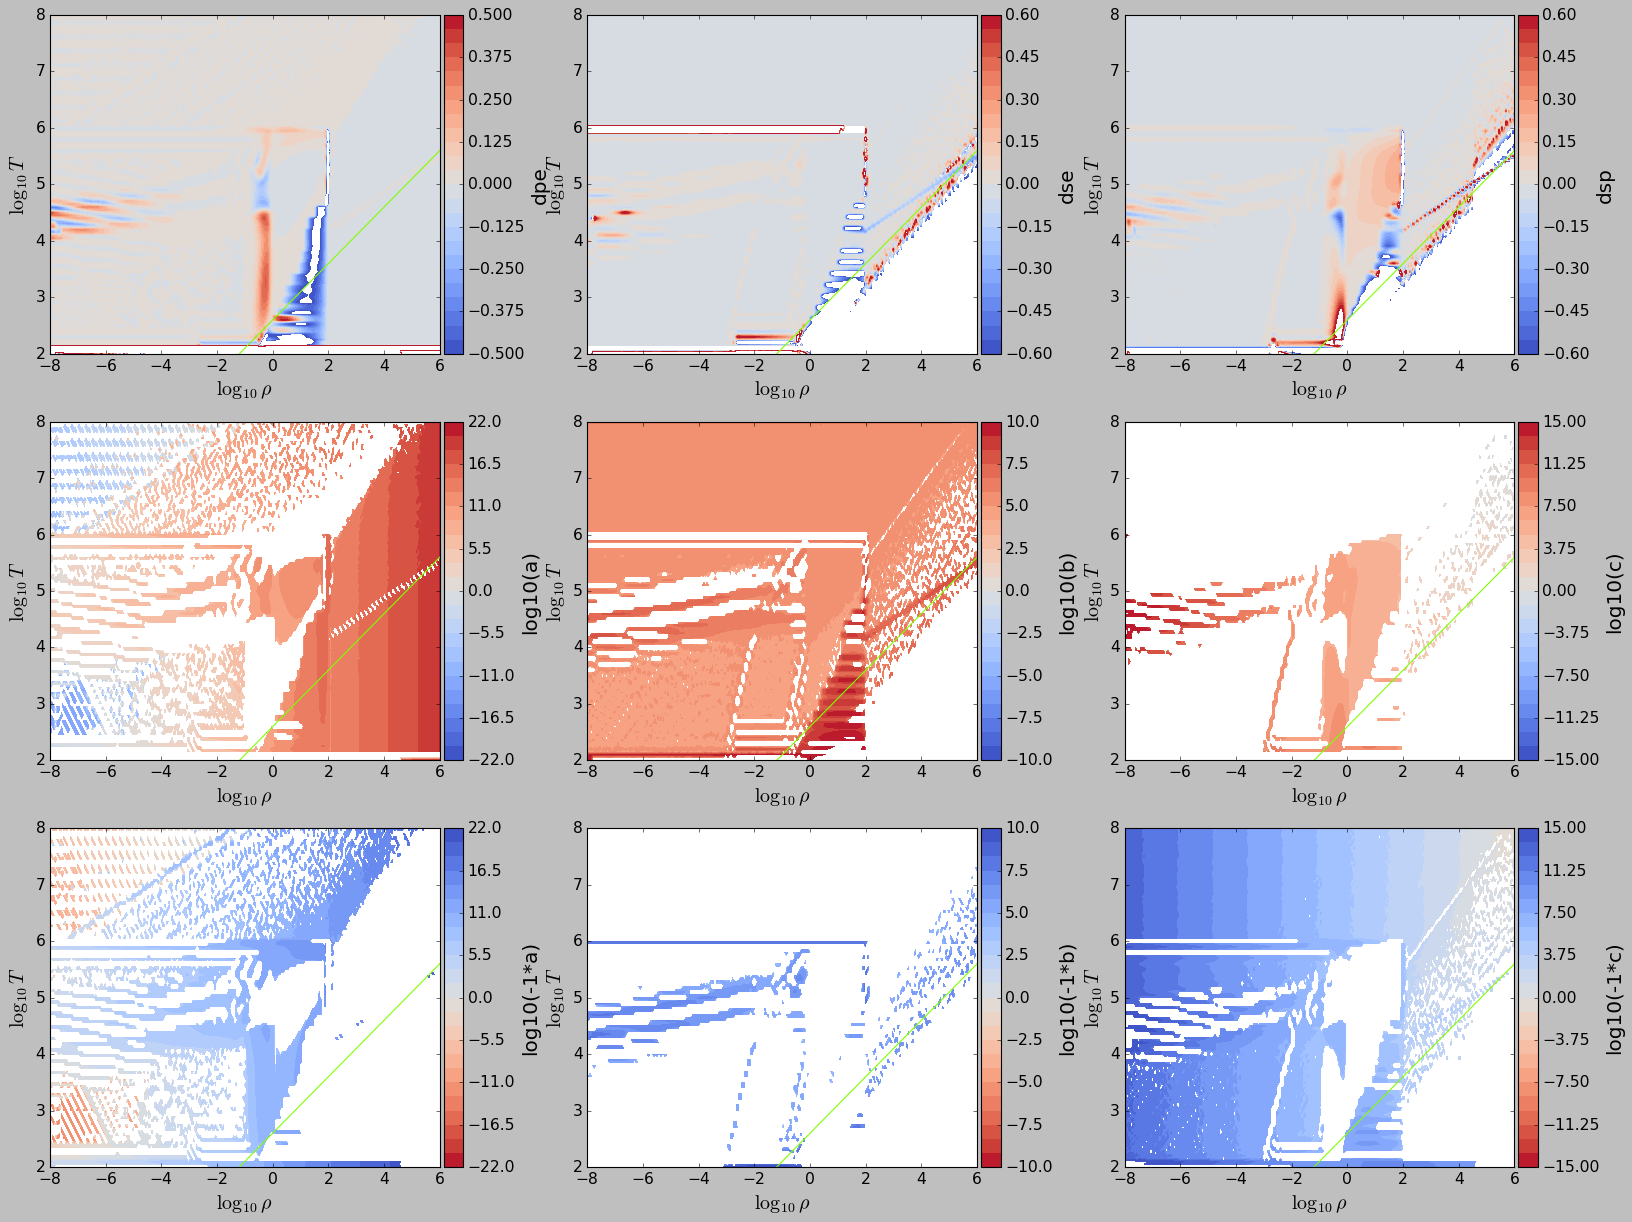

In [4]:
dpe, dse, dsp, a, b, c = meos.consistency_metrics(toy, 10**toy.log10Pgrid,10**toy.log10Sgrid,10**toy.log10Ugrid,dP_drho, dS_drho, dE_drho, dP_dT, dS_dT, dE_dT,species='H',maskUnphysicalRegion=False,plot=True, savename=None)

#dpe, dse, dsp, a, b, c = meos.consistency_metrics(toy, 10**toy.log10Pgrid,10**toy.log10Sgrid,10**toy.log10Ugrid,dP_drho, dS_drho, dE_drho, dP_dT, dS_dT_interp, dE_dT,species='H',maskUnphysicalRegion=True,plot=True, savename=None)


# dsp is now perfect, but dpe and dse are OOM the same as for the original CMS tables. 

# However, if we restrict ourselves to the region 5.2 < log10T < 7.9, we have tables that are truly perfect by all three metrics. So let's use that.

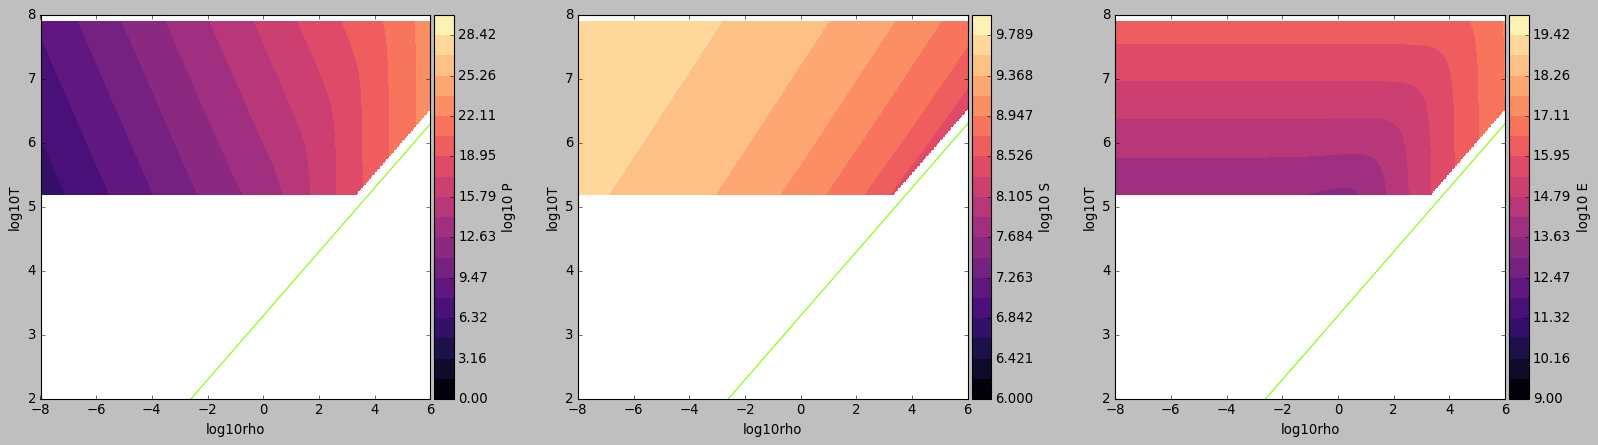

In [10]:
boundary = 3.4 + 0.5*toy.log10rhogrid + np.log10(toy.atomic_number) - (5./3)*np.log10(toy.mass_number)
mask = (toy.log10Tgrid < boundary) | (toy.log10Tgrid < 5.2) | (toy.log10Tgrid > 7.9)
allowedMask = ~mask
    
toy.log10Pgrid = np.ma.array(toy.log10Pgrid, mask=~allowedMask, fill_value = np.nan)
toy.log10Sgrid = np.ma.array(toy.log10Sgrid, mask=~allowedMask, fill_value = np.nan)
toy.log10Ugrid = np.ma.array(toy.log10Ugrid, mask=~allowedMask, fill_value = np.nan)
dP_drho = np.ma.array(dP_drho, mask=~allowedMask, fill_value = np.nan)
dS_drho = np.ma.array(dP_drho, mask=~allowedMask, fill_value = np.nan)
dE_drho = np.ma.array(dP_drho, mask=~allowedMask, fill_value = np.nan)
dP_dT = np.ma.array(dP_dT, mask=~allowedMask, fill_value = np.nan)
dP_dT = np.ma.array(dP_dT, mask=~allowedMask, fill_value = np.nan)
dP_dT = np.ma.array(dP_dT, mask=~allowedMask, fill_value = np.nan)
dpe = np.ma.array(dpe, mask=~allowedMask, fill_value = np.nan)
dse = np.ma.array(dse, mask=~allowedMask, fill_value = np.nan)
dsp = np.ma.array(dsp, mask=~allowedMask, fill_value = np.nan)
a = np.ma.array(a, mask=~allowedMask, fill_value = np.nan)
b = np.ma.array(b, mask=~allowedMask, fill_value = np.nan)
c = np.ma.array(c, mask=~allowedMask, fill_value = np.nan)


meos.plot_PSE(toy, 10**toy.log10Pgrid,10**toy.log10Sgrid,10**toy.log10Ugrid)

In [ ]:
meos.contourf_sublots_with_colorbars(nRow=3, nCol=3, 
                                xs=[toy.log10rhogrid,toy.log10rhogrid,toy.log10rhogrid,toy.log10rhogrid,toy.log10rhogrid,toy.log10rhogrid,toy.log10rhogrid,toy.log10rhogrid,toy.log10rhogrid],
                                ys=[toy.log10Tgrid,toy.log10Tgrid,toy.log10Tgrid,toy.log10Tgrid,toy.log10Tgrid,toy.log10Tgrid,toy.log10Tgrid,toy.log10Tgrid,toy.log10Tgrid],
                                zs=[dpe, dse, dsp, np.log10(a),np.log10(b),np.log10(c), np.log10(-1*a),np.log10(-1*b),np.log10(-1*c)],
                                xlims=[(-8,6),(-8,6),(-8,6),(-8,6),(-8,6),(-8,6),(-8,6),(-8,6),(-8,6)], 
                                ylims=[(2,8),(2,8),(2,8),(2,8),(2,8),(2,8),(2,8),(2,8),(2,8)], 
                                zlims=[(-0.5,0.5),(-0.6,0.6),(-0.6,0.6),(-22,22),(-10,10),(-15,15),(-22,22),(-10,10),(-15,15)], 
                                levels=[25,25,25,25,25,25,25,25,25], 
                                xlabels=[r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$'],
                                ylabels=[r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$'],
                                zlabels=['dpe','dse','dsp','log10(a)','log10(b)','log10(c)','log10(-a)','log10(-b)','log10(-c)'],
                                cmap=['coolwarm','coolwarm','coolwarm','coolwarm','coolwarm','coolwarm_r','coolwarm_r','coolwarm_r','coolwarm_r'], vlines=None, hlines=None, otherlines_x=None, otherlines_y=None, savename=None)


/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_80285/2316174667.py:4: RuntimeWarning: divide by zero encountered in log10
  zs=[dpe, dse, dsp, np.log10(a),np.log10(b),np.log10(c), np.log10(-1*a),np.log10(-1*b),np.log10(-1*c)],
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_80285/2316174667.py:4: RuntimeWarning: invalid value encountered in log10
  zs=[dpe, dse, dsp, np.log10(a),np.log10(b),np.log10(c), np.log10(-1*a),np.log10(-1*b),np.log10(-1*c)],


In [ ]:
fig, axes = plt.subplots(1,3,figsize=(16,6))
axes[0].hist(np.ravel(dpe),range=(-0.05,0.05),bins=20,color='b',alpha=0.5)
axes[1].hist(np.ravel(dse),range=(-0.05,0.05),bins=20,color='b',alpha=0.5)
axes[2].hist(np.ravel(dsp),range=(-0.05,0.05),bins=20,color='b',alpha=0.5)
for ax in axes:
    ax.axvline(0,color='r')
plt.show()

# Now perturb the P, S, E values and calculate the thermodynamic consistency metrics again.

In [ ]:
print(np.median(np.ravel(toy.log10Pgrid.filled(fill_value=np.nan))[np.isfinite(np.ravel(toy.log10Pgrid.filled(fill_value=np.nan)))]))
print(np.median(np.ravel(toy.log10Sgrid.filled(fill_value=np.nan))[np.isfinite(np.ravel(toy.log10Sgrid.filled(fill_value=np.nan)))]))
print(np.median(np.ravel(toy.log10Ugrid.filled(fill_value=np.nan))[np.isfinite(np.ravel(toy.log10Ugrid.filled(fill_value=np.nan)))]))


In [14]:
perturbed = copy.deepcopy(toy)
np.random.seed(200)
perturbed.log10Pgrid = perturbed.log10Pgrid + np.random.normal(loc=0.,scale=1,size=np.shape(perturbed.log10Pgrid))
perturbed.log10Sgrid = perturbed.log10Sgrid + np.random.normal(loc=0.,scale=0.1,size=np.shape(perturbed.log10Sgrid))
perturbed.log10Ugrid = perturbed.log10Ugrid + np.random.normal(loc=0.,scale=1,size=np.shape(perturbed.log10Ugrid))

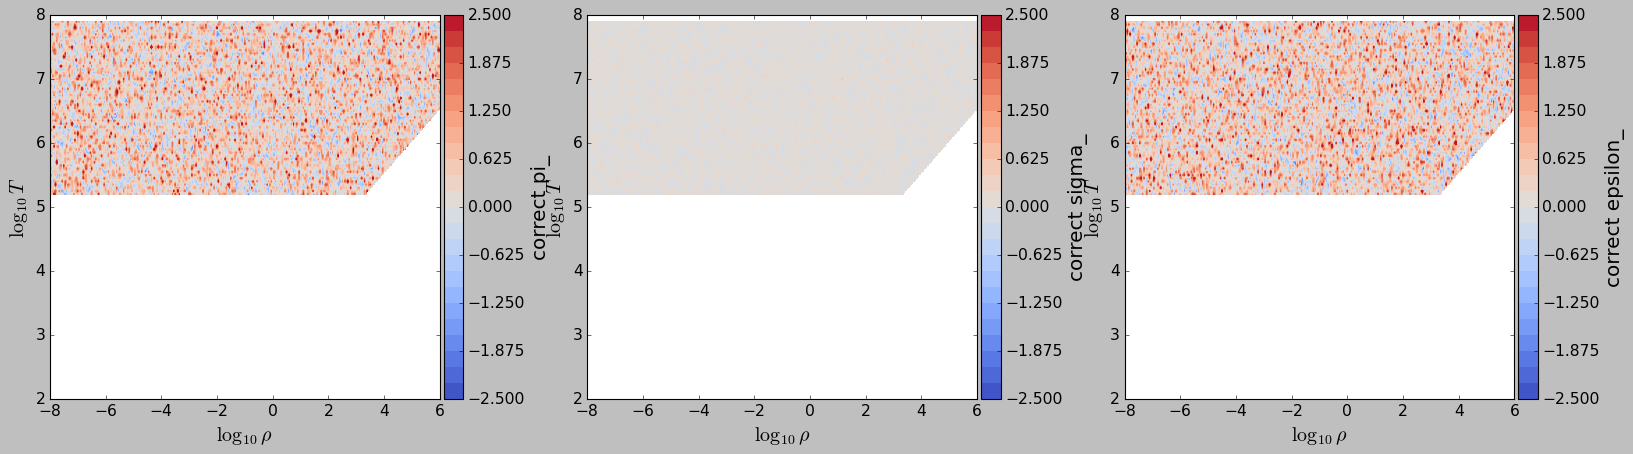

In [15]:
correct_pi_ = toy.log10Pgrid - perturbed.log10Pgrid
correct_sigma_ = toy.log10Sgrid - perturbed.log10Sgrid
correct_epsilon_ = toy.log10Ugrid - perturbed.log10Ugrid

meos.contourf_sublots_with_colorbars(nRow=1, nCol=3, 
                                xs=[perturbed.log10rhogrid,perturbed.log10rhogrid,perturbed.log10rhogrid],
                                ys=[perturbed.log10Tgrid,perturbed.log10Tgrid,perturbed.log10Tgrid],
                                zs=[correct_pi_, correct_sigma_, correct_epsilon_],
                                xlims=[(-8,6),(-8,6),(-8,6)],
                                ylims=[(2,8),(2,8),(2,8)],
                                zlims=[(-2.5,2.5),(-2.5,2.5),(-2.5,2.5)],
                                levels=[25,25,25],
                                xlabels=[r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$'],
                                ylabels=[r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$'],
                                zlabels=['correct pi_','correct sigma_','correct epsilon_'],
                                cmap=['coolwarm','coolwarm','coolwarm'], vlines=None, hlines=None, otherlines_x=None, otherlines_y=None, savename=None)


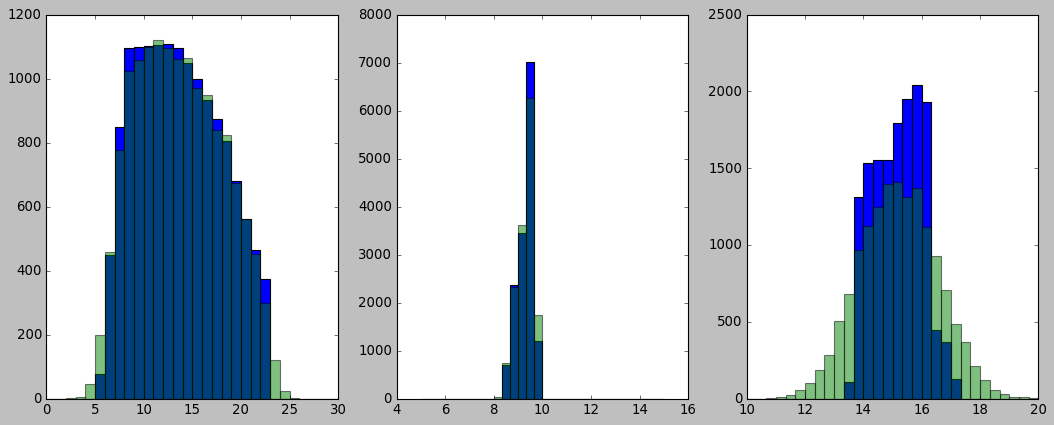

In [16]:
fig,axes = plt.subplots(1,3,figsize=(16,6))

axes[0].hist(np.ravel(toy.log10Pgrid.filled(fill_value=np.nan)),color='b',range=(0,30),bins=30)
axes[0].hist(np.ravel(perturbed.log10Pgrid.filled(fill_value=np.nan)),color='g',range=(0,30),bins=30,alpha=0.5)
axes[1].hist(np.ravel(toy.log10Sgrid.filled(fill_value=np.nan)),color='b',range=(5,15),bins=30)
axes[1].hist(np.ravel(perturbed.log10Sgrid.filled(fill_value=np.nan)),color='g',range=(5,15),bins=30,alpha=0.5)
axes[2].hist(np.ravel(toy.log10Ugrid.filled(fill_value=np.nan)),color='b',range=(10,20),bins=30)
axes[2].hist(np.ravel(perturbed.log10Ugrid.filled(fill_value=np.nan)),color='g',range=(10,20),bins=30,alpha=0.5)

plt.show()

In [17]:
# gaussian smoothing
perturbed.log10Pgrid = gaussian_filter(perturbed.log10Pgrid, sigma=1, mode='reflect')
perturbed.log10Sgrid = gaussian_filter(perturbed.log10Sgrid, sigma=1, mode='reflect')
perturbed.log10Ugrid = gaussian_filter(perturbed.log10Ugrid, sigma=1, mode='reflect')

[[-- -- -- ... 8.049749897129946 -- --]
 [-- -- -- ... 7.311049640934497 -- --]
 [-- -- -- ... 7.111512812695612 -- --]
 ...
 [-- -- -- ... 22.000143921601264 -- --]
 [-- -- -- ... 22.462952092872744 -- --]
 [-- -- -- ... 22.72961365167989 -- --]]


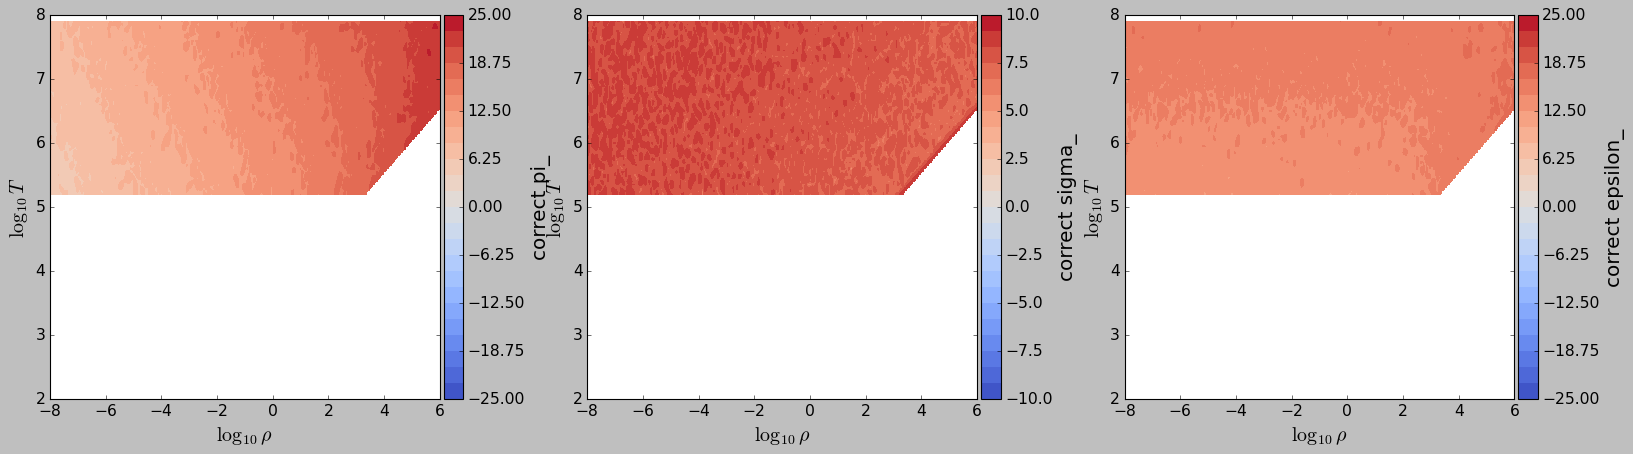

In [19]:
correct_pi_ = 10**toy.log10Pgrid - 10**perturbed.log10Pgrid
correct_sigma_ = 10**toy.log10Sgrid - 10**perturbed.log10Sgrid
correct_epsilon_ = 10**toy.log10Ugrid - 10**perturbed.log10Ugrid
print(np.log10(np.abs(correct_pi_)))

meos.contourf_sublots_with_colorbars(nRow=1, nCol=3, 
                                xs=[perturbed.log10rhogrid,perturbed.log10rhogrid,perturbed.log10rhogrid],
                                ys=[perturbed.log10Tgrid,perturbed.log10Tgrid,perturbed.log10Tgrid],
                                zs=[np.log10(np.abs(correct_pi_)), np.log10(np.abs(correct_sigma_)), np.log10(np.abs(correct_epsilon_))],
                                xlims=[(-8,6),(-8,6),(-8,6)],
                                ylims=[(2,8),(2,8),(2,8)],
                                zlims=[(-25,25),(-10,10),(-25,25)],
                                levels=[25,25,25],
                                xlabels=[r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$'],
                                ylabels=[r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$'],
                                zlabels=['correct pi_','correct sigma_','correct epsilon_'],
                                cmap=['coolwarm','coolwarm','coolwarm'], vlines=None, hlines=None, otherlines_x=None, otherlines_y=None, savename=None)


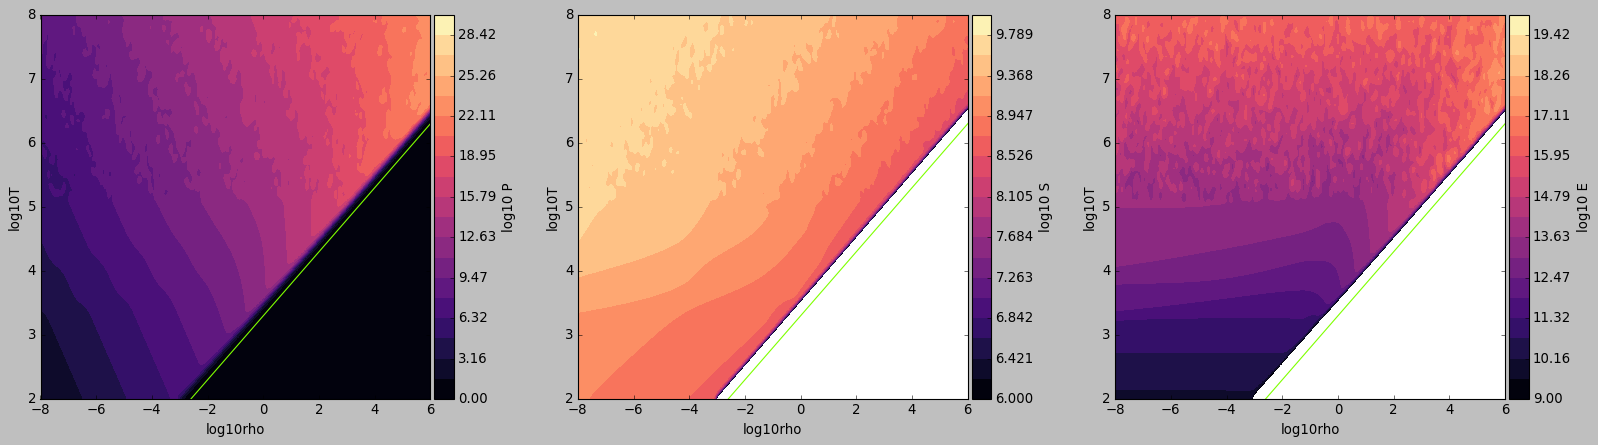

In [20]:
meos.plot_PSE(perturbed, 10**perturbed.log10Pgrid,10**perturbed.log10Sgrid,10**perturbed.log10Ugrid)

/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:946: RuntimeWarning: divide by zero encountered in log10
  zs=[np.log10(dP_drho_T),np.log10(-1*dS_drho_T),np.log10(np.abs(dE_drho_T)),np.log10(dP_dT_rho),np.log10(dS_dT_rho),np.log10(dE_dT_rho)],


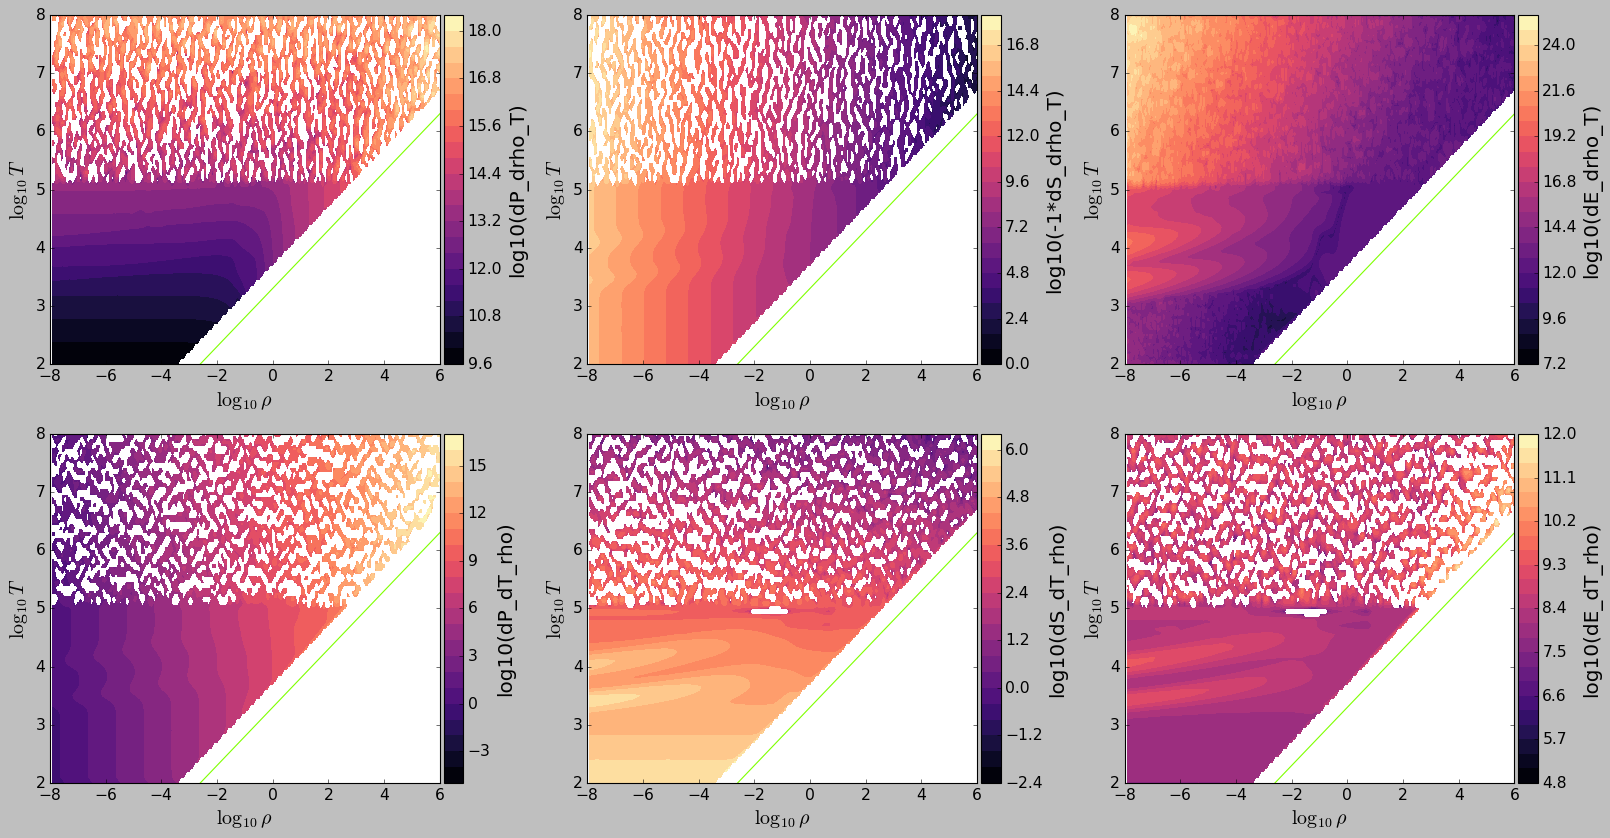

In [21]:
per_dP_drho, per_dS_drho, per_dE_drho, per_dP_dT, per_dS_dT, per_dE_dT =  meos.finite_difference(perturbed, 10**perturbed.log10Pgrid,10**perturbed.log10Sgrid,10**perturbed.log10Ugrid,
                                                                         species='H', maskUnphysicalRegion=True, plot=True, savename=None)


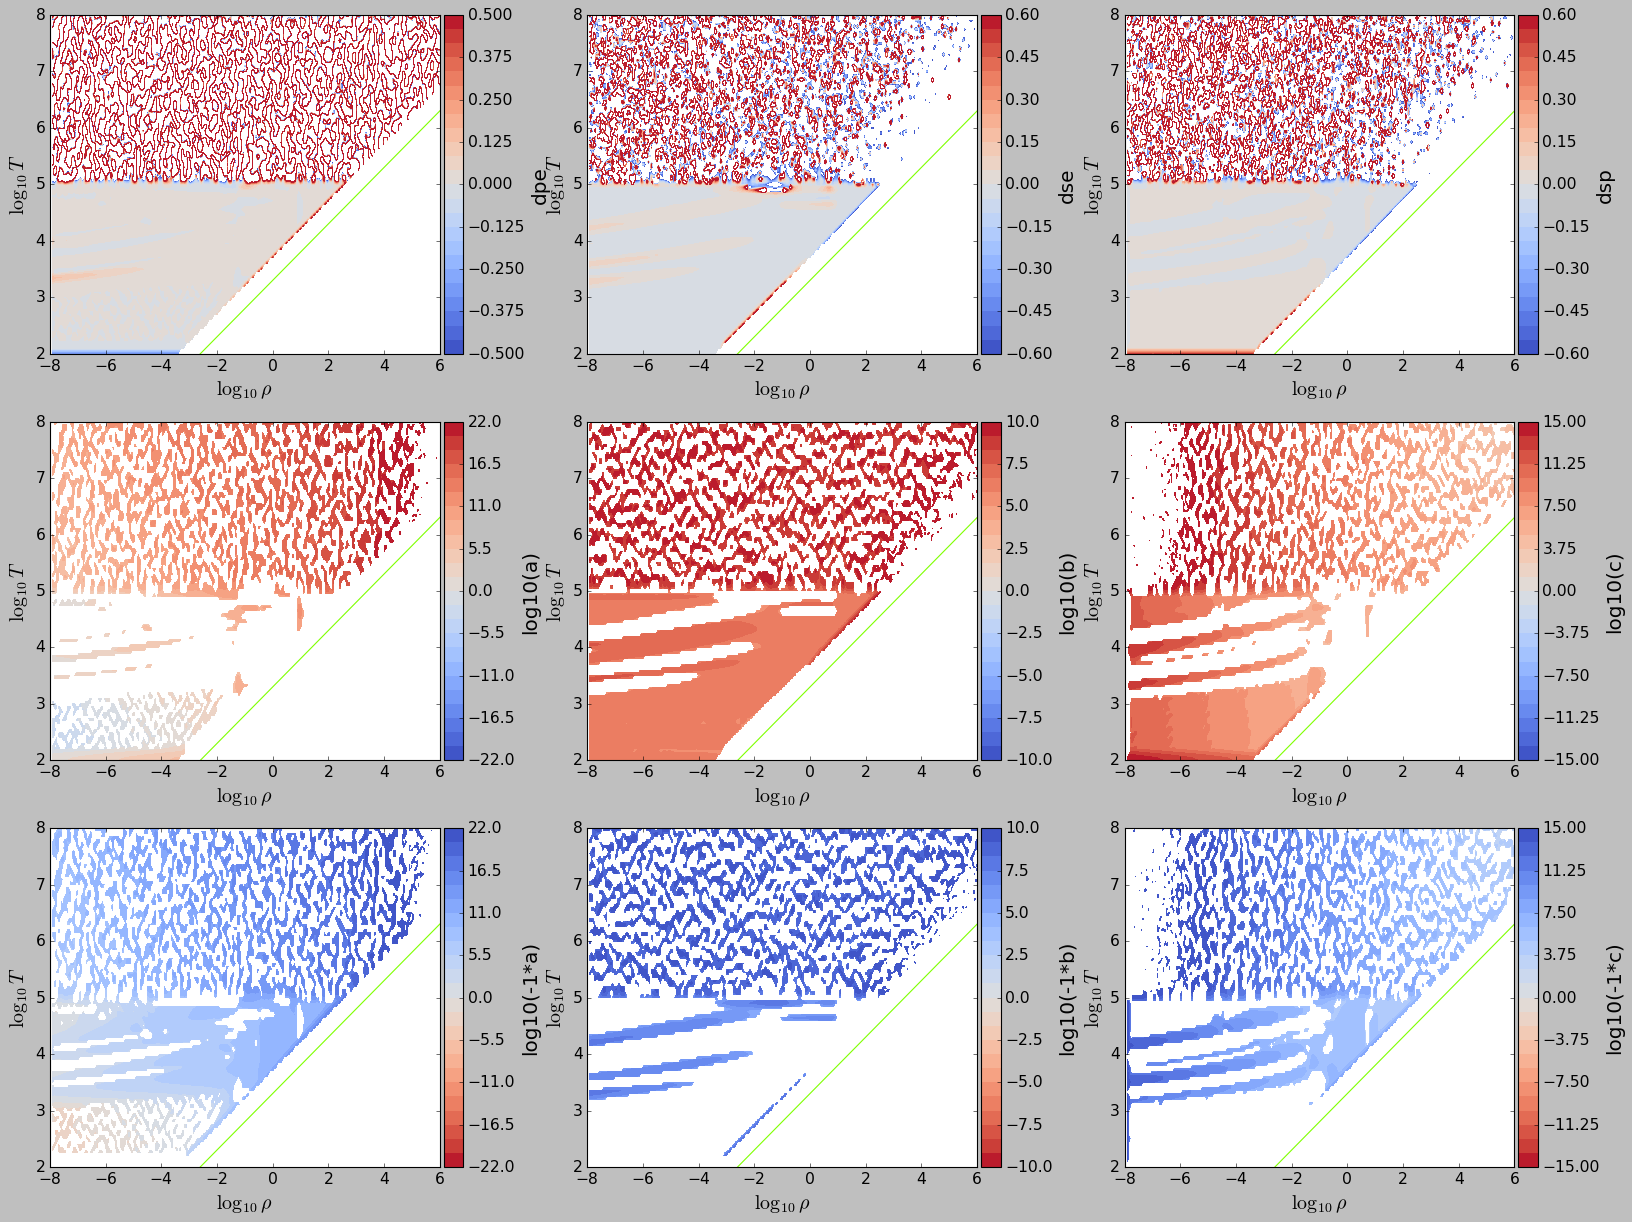

In [22]:
per_dpe, per_dse, per_dsp, per_a, per_b, per_c = meos.consistency_metrics(perturbed, 10**perturbed.log10Pgrid,10**perturbed.log10Sgrid,10**perturbed.log10Ugrid,
                                                                          per_dP_drho, per_dS_drho, per_dE_drho, per_dP_dT, per_dS_dT, per_dE_dT,
                                                                          species='H',maskUnphysicalRegion=True,plot=True, savename=None)



In [23]:
boundary = 3.4 + 0.5*perturbed.log10rhogrid + np.log10(perturbed.atomic_number) - (5./3)*np.log10(perturbed.mass_number)
mask = (perturbed.log10Tgrid < boundary) | (perturbed.log10Tgrid < 5.2) | (perturbed.log10Tgrid > 7.9)
allowedMask = ~mask
    
perturbed.log10Pgrid = np.ma.array(perturbed.log10Pgrid, mask=~allowedMask, fill_value = np.nan)
perturbed.log10Sgrid = np.ma.array(perturbed.log10Sgrid, mask=~allowedMask, fill_value = np.nan)
perturbed.log10Ugrid = np.ma.array(perturbed.log10Ugrid, mask=~allowedMask, fill_value = np.nan)
per_dP_drho = np.ma.array(per_dP_drho, mask=~allowedMask, fill_value = np.nan)
per_dS_drho = np.ma.array(per_dP_drho, mask=~allowedMask, fill_value = np.nan)
per_dE_drho = np.ma.array(per_dP_drho, mask=~allowedMask, fill_value = np.nan)
per_dP_dT = np.ma.array(per_dP_dT, mask=~allowedMask, fill_value = np.nan)
per_dP_dT = np.ma.array(per_dP_dT, mask=~allowedMask, fill_value = np.nan)
per_dP_dT = np.ma.array(per_dP_dT, mask=~allowedMask, fill_value = np.nan)
per_dpe = np.ma.array(per_dpe, mask=~allowedMask, fill_value = np.nan)
per_dse = np.ma.array(per_dse, mask=~allowedMask, fill_value = np.nan)
per_dsp = np.ma.array(per_dsp, mask=~allowedMask, fill_value = np.nan)
per_a = np.ma.array(per_a, mask=~allowedMask, fill_value = np.nan)
per_b = np.ma.array(per_b, mask=~allowedMask, fill_value = np.nan)
per_c = np.ma.array(per_c, mask=~allowedMask, fill_value = np.nan)



In [24]:
test = 'test'
print(type(test))
if isinstance(test,str):
    print('yes')

<class 'str'>
yes


/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_78540/2849987771.py:4: RuntimeWarning: invalid value encountered in log10
  zs=[per_dpe, per_dse, per_dsp, np.log10(per_a),np.log10(per_b),np.log10(per_c),np.log10(-1*per_a),np.log10(-1*per_b),np.log10(-1*per_c)],


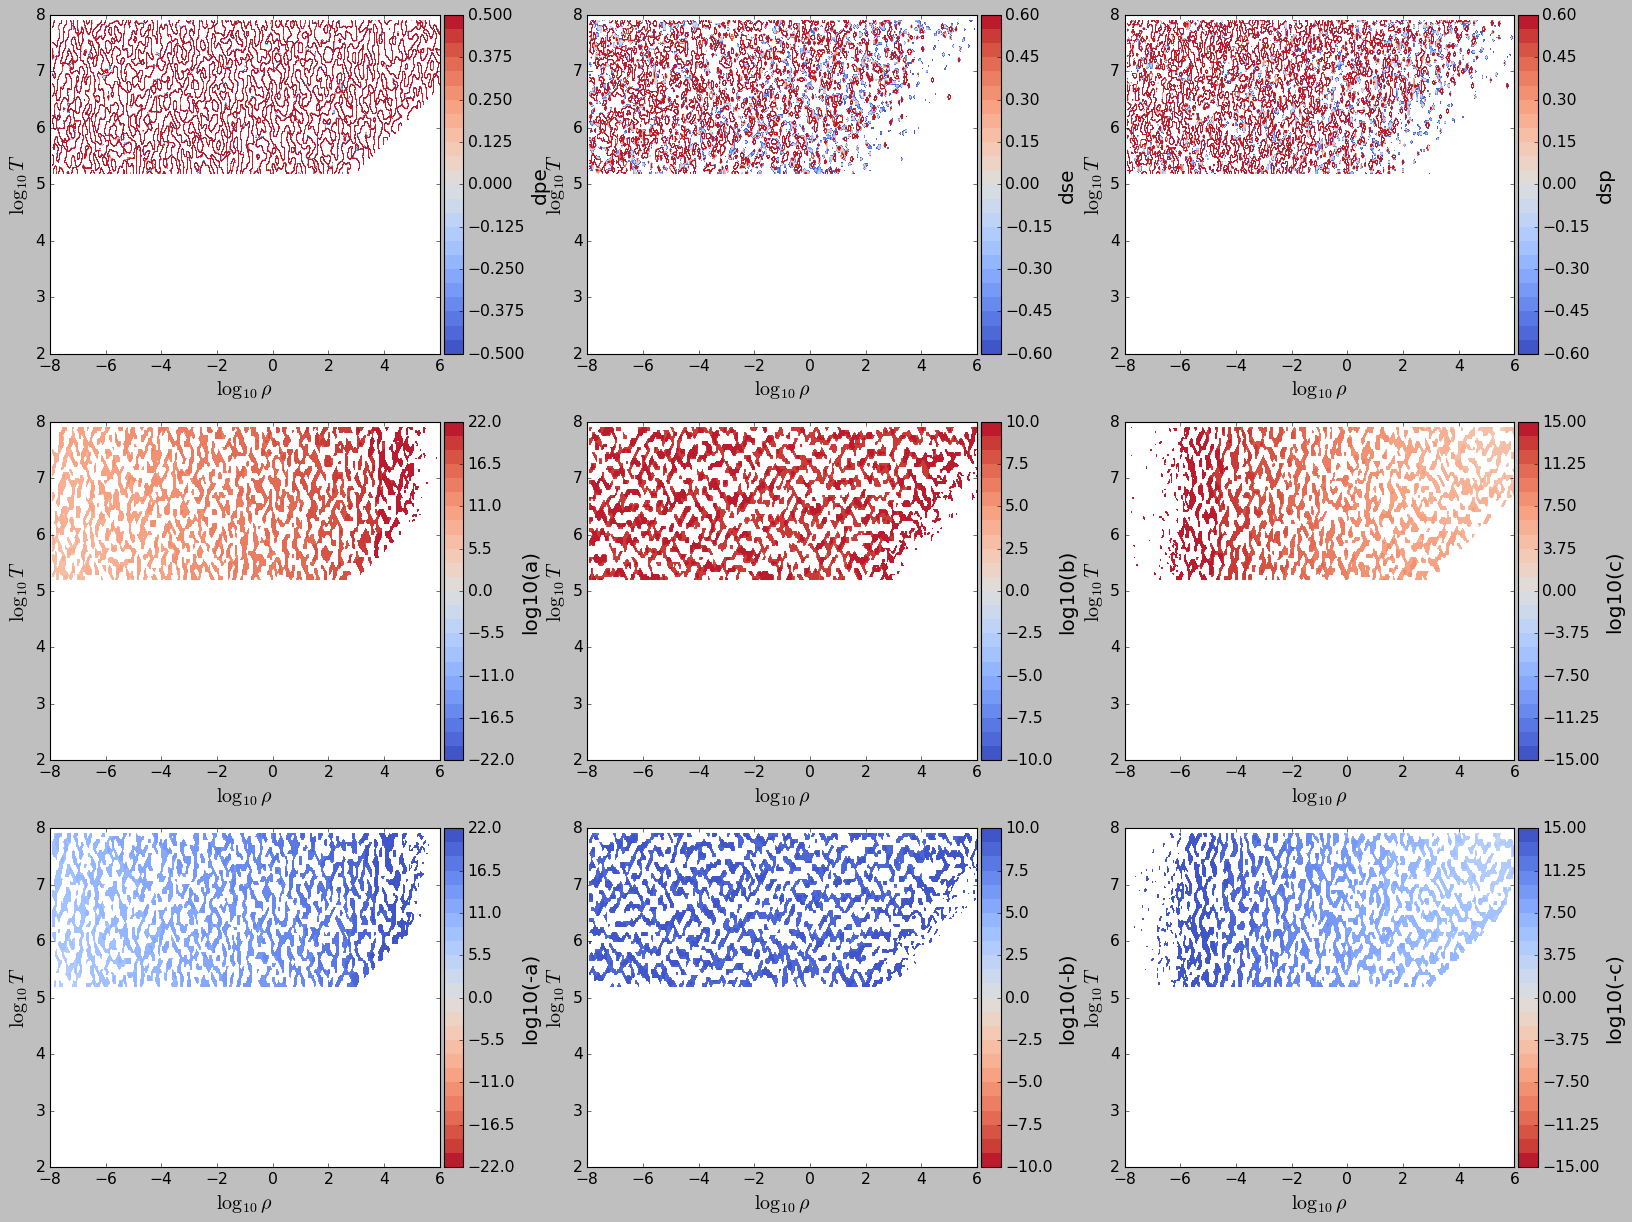

In [25]:
meos.contourf_sublots_with_colorbars(nRow=3, nCol=3, 
                                xs=[perturbed.log10rhogrid,perturbed.log10rhogrid,perturbed.log10rhogrid,perturbed.log10rhogrid,perturbed.log10rhogrid,perturbed.log10rhogrid,perturbed.log10rhogrid,perturbed.log10rhogrid,perturbed.log10rhogrid],
                                ys=[perturbed.log10Tgrid,perturbed.log10Tgrid,perturbed.log10Tgrid,perturbed.log10Tgrid,perturbed.log10Tgrid,perturbed.log10Tgrid,perturbed.log10Tgrid,perturbed.log10Tgrid,perturbed.log10Tgrid],
                                zs=[per_dpe, per_dse, per_dsp, np.log10(per_a),np.log10(per_b),np.log10(per_c),np.log10(-1*per_a),np.log10(-1*per_b),np.log10(-1*per_c)],
                                xlims=[(-8,6),(-8,6),(-8,6),(-8,6),(-8,6),(-8,6),(-8,6),(-8,6),(-8,6)], 
                                ylims=[(2,8),(2,8),(2,8),(2,8),(2,8),(2,8),(2,8),(2,8),(2,8)], 
                                zlims=[(-0.5,0.5),(-0.6,0.6),(-0.6,0.6),(-22,22),(-10,10),(-15,15),(-22,22),(-10,10),(-15,15)], 
                                levels=[25,25,25,25,25,25,25,25,25], 
                                xlabels=[r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$'],
                                ylabels=[r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$'],
                                zlabels=['dpe','dse','dsp','log10(a)','log10(b)','log10(c)','log10(-a)','log10(-b)','log10(-c)'],
                                cmap=['coolwarm','coolwarm','coolwarm','coolwarm','coolwarm','coolwarm','coolwarm_r','coolwarm_r','coolwarm_r'], vlines=None, hlines=None, otherlines_x=None, otherlines_y=None, savename=None)


# numerical integration of system defined on lab notebook pages 156-157

In [5]:
def naive_grid_update(CMStable, P,S,E, species='H', ic='oom', plot=False, nUpdates=1, gaussian_blur_sigma=1, soften=1):
    log10rho = CMStable.log10rhogrid
    log10T = CMStable.log10Tgrid

    #print(log10rho)
    #print(log10T)
    
    rho = 10**CMStable.log10rhogrid
    T = 10**CMStable.log10Tgrid

    grid_rho = rho[:,0]
    grid_T = T[0]

    grid_log10rho = log10rho[:,0]
    grid_log10T = log10T[0]

    nrho = len(grid_rho)
    nT = len(grid_T)

    P_init = copy.deepcopy(P)
    S_init = copy.deepcopy(S)
    E_init = copy.deepcopy(E)

    dP_drho_T, dS_drho_T, dE_drho_T, dP_dT_rho, dS_dT_rho, dE_dT_rho = meos.finite_difference(CMStable,P_init,S_init,E_init,species,maskUnphysicalRegion=True,plot=False,savename=None)
   
    dpe, dse, dsp, a, b, c = meos.consistency_metrics(CMStable,P_init,S_init,E_init,dP_drho_T, dS_drho_T, dE_drho_T, dP_dT_rho, dS_dT_rho, dE_dT_rho,species,maskUnphysicalRegion=True,plot=False,savename=None)

    b += 1
    
    da_drho, da_dT = meos.finite_difference_single_grid(grid=a, log10rhogrid=log10rho, log10Tgrid=log10T)
    db_drho, db_dT = meos.finite_difference_single_grid(grid=a, log10rhogrid=log10rho, log10Tgrid=log10T)
    dc_drho, dc_dT = meos.finite_difference_single_grid(grid=a, log10rhogrid=log10rho, log10Tgrid=log10T)
    
    if ic == 'random':
        np.random.seed(200)
        scale = 1.e2

        pi_mat_init = np.random.normal(loc=0.,scale=scale,size=(nrho,nT))
        sigma_mat_init = np.random.normal(loc=0.,scale=scale,size=(nrho,nT))
        epsilon_mat_init = np.random.normal(loc=0.,scale=scale,size=(nrho,nT))

        # make sure masked
        pi_mat_init = pi_mat_init + dpe - dpe
        sigma_mat_init = sigma_mat_init + dpe - dpe
        epsilon_mat_init = epsilon_mat_init + dpe - dpe

    elif ic == 'oom':
        epsilon_mat_init = a/rho

        sigma_mat_init = epsilon_mat_init/T + b
        
        pi_mat_init = (T*rho**2)*(c - (sigma_mat_init/rho))

        # blur with gaussian filter
        #epsilon_mat_init = gaussian_filter(epsilon_mat_init, sigma=gaussian_blur_sigma, mode='nearest') + a - a # this dumb step is to preserve the array masking
        #sigma_mat_init = gaussian_filter(sigma_mat_init, sigma=gaussian_blur_sigma, mode='nearest') + a - a
        #pi_mat_init = gaussian_filter(pi_mat_init, sigma=gaussian_blur_sigma, mode='nearest') + a - a

        # make smaller
        epsilon_mat_init = epsilon_mat_init/np.max(epsilon_mat_init)
        sigma_mat_init = sigma_mat_init/np.max(sigma_mat_init)
        pi_mat_init = pi_mat_init/np.max(pi_mat_init)
        
        # avoid big changes
        #epsilon_mat_init[np.abs(epsilon_mat_init/E_init) > 0.1] = 0.1*E_init[np.abs(epsilon_mat_init/E_init) > 0.1]
        #sigma_mat_init[np.abs(sigma_mat_init/S_init) > 0.1] = 0.1*S_init[np.abs(sigma_mat_init/S_init) > 0.1]
        #pi_mat_init[np.abs(pi_mat_init/P_init) > 0.1] = 0.1*P_init[np.abs(pi_mat_init/P_init) > 0.1]

    elif ic == 'ones':
        pi_mat_init = np.ones_like(rho)
        sigma_mat_init = np.ones_like(rho)
        epsilon_mat_init = np.ones_like(rho)
    
    elif ic == 'true':
        pi_mat_init = correct_pi_
        sigma_mat_init = correct_sigma_
        epsilon_mat_init = correct_epsilon_
        
    print(np.min(pi_mat_init),np.max(pi_mat_init))
    print(np.min(sigma_mat_init),np.max(sigma_mat_init))
    print(np.min(epsilon_mat_init),np.max(epsilon_mat_init))
    """
    fig, axes = plt.subplots(1,3,figsize=(16,6))
    axes[0].hist(np.ravel(np.log10(pi_mat_init)),color='b',range=(5,25),bins=30,alpha=0.5)
    axes[0].hist(np.ravel(np.log10(-1*pi_mat_init)),color='r',range=(5,25),bins=30,alpha=0.5)
    axes[1].hist(np.ravel(np.log10(sigma_mat_init)),color='b',range=(4,16),bins=30,alpha=0.5)
    axes[1].hist(np.ravel(np.log10(-1*sigma_mat_init)),color='r',range=(4,16),bins=30,alpha=0.5)
    axes[2].hist(np.ravel(np.log10(epsilon_mat_init)),color='b',range=(10,22),bins=30,alpha=0.5)        
    axes[2].hist(np.ravel(np.log10(-1*epsilon_mat_init)),color='r',range=(10,22),bins=30,alpha=0.5)
    plt.show()
    """
    """
    meos.contourf_sublots_with_colorbars(nRow=1, nCol=3, 
                                xs=[log10rho,log10rho,log10rho],
                                ys=[log10T,log10T,log10T],
                                zs=[pi_mat_init, sigma_mat_init,epsilon_mat_init],
                                xlims=[(-8,6),(-8,6),(-8,6)], 
                                ylims=[(2,8),(2,8),(2,8)], 
                                zlims=[(-2.5,2.5),(-2.5,2.5),(-2.5,2.5)], 
                                levels=[25,25,25],
                                xlabels=['log10rho','log10rho','log10rho'],
                                ylabels=['log10T','log10T','log10T'],
                                zlabels=['pi_init','sigma_init','epsilon_init'],
                                cmap='coolwarm', vlines=None, hlines=None, otherlines_x=None, otherlines_y=None, savename=None)

    """
    del_logrho = 0.05
    del_logT = 0.05

    epsilon_mat = copy.deepcopy(epsilon_mat_init)
    sigma_mat = copy.deepcopy(sigma_mat_init)
    pi_mat = copy.deepcopy(pi_mat_init)

    log10rho_masked = np.round(log10rho + dpe - dpe, 2)
    log10T_masked = np.round(log10T + dpe - dpe, 2)

    grid_log10rho_masked = np.sort(np.unique(log10rho_masked.filled(fill_value=np.nan)))
    grid_log10T_masked = np.sort(np.unique(log10T_masked.filled(fill_value=np.nan)))

    grid_log10rho_masked = grid_log10rho_masked[~np.isnan(grid_log10rho_masked)]
    grid_log10T_masked = grid_log10T_masked[~np.isnan(grid_log10T_masked)]

    nrho_masked = len(grid_log10rho_masked)
    nT_masked = len(grid_log10T_masked)
    
    upper_i = np.arange(len(grid_log10rho))[grid_log10rho == grid_log10rho_masked[0]] + 10
    lower_i = np.arange(len(grid_log10rho))[grid_log10rho == grid_log10rho_masked[-1]] - 200
    left_j = np.arange(len(grid_log10T))[grid_log10T == grid_log10T_masked[0]] + 6
    right_j = np.arange(len(grid_log10T))[grid_log10T == grid_log10T_masked[-1]] - 6

    print(upper_i, lower_i, left_j, right_j)
    
    for k in range(nUpdates):
        small = 1.e-20
        # boundary conditions
        sigma_mat[upper_i, left_j] = small #sigma_mat_init[upper_i, left_j]
        sigma_mat[upper_i, right_j] = small #sigma_mat_init[upper_i, right_j]
        sigma_mat[lower_i, left_j] = small #sigma_mat_init[lower_i, left_j]
        sigma_mat[lower_i, right_j] = small #sigma_mat_init[lower_i, right_j]
        #sigma_mat[upper_i] = small
        #sigma_mat[lower_i] = small
        #sigma_mat[:,left_j] = small
        #sigma_mat[:,right_j] = small

        epsilon_mat[upper_i, left_j] = small #epsilon_mat_init[upper_i, left_j]
        epsilon_mat[upper_i, right_j] = small #epsilon_mat_init[upper_i, right_j]
        epsilon_mat[lower_i, left_j] = small #epsilon_mat_init[lower_i, left_j]
        epsilon_mat[lower_i, right_j] = small #epsilon_mat_init[lower_i, right_j]
        #epsilon_mat[upper_i] = small
        #epsilon_mat[lower_i] = small
        #epsilon_mat[:,left_j] = small
        #epsilon_mat[:,right_j] = small

        pi_mat[upper_i, left_j] = small #pi_mat_init[upper_i, left_j]
        pi_mat[upper_i, right_j] = small #pi_mat_init[upper_i, right_j]
        pi_mat[lower_i, left_j] = small #pi_mat_init[lower_i, left_j]
        pi_mat[lower_i, right_j] = small #pi_mat_init[lower_i, right_j]
        #pi_mat[upper_i] = small
        #pi_mat[lower_i] = small
        #pi_mat[:,left_j] = small
        #pi_mat[:,right_j] = small

        # cap changes
        #epsilon_mat[np.abs(epsilon_mat/E_init) > 0.01] *= 1.e-6
        #sigma_mat[np.abs(sigma_mat/S_init) > 0.01] *= 1.e-6
        #pi_mat[np.abs(pi_mat/P_init) > 0.01] *= 1.e-6

        #epsilon_mat = np.abs(epsilon_mat)
        #pi_mat = np.abs(pi_mat)
        #sigma_mat = np.abs(sigma_mat)
        
        for j in range(5,nT-5):
            max_i = np.argmax(log10rho_masked[:,j]) 
            for i in range(5,max_i-5):
                # forward diff
                del_T = T[i,j] * (10**del_logT - 1)
                del_rho = rho[i,j] * (10**del_logrho - 1)
                #sigma_mat[i+1,j] = sigma_mat[i,j] + del_rho*( c[i,j] - (1/(rho[i,j]**2 * del_T))*(pi_mat[i,j+1] - pi_mat[i,j]) )

                # central diff
                two_del_T = T[i,j] * (10**del_logT - 10**(-1*del_logT))
                two_del_rho = rho[i,j] * (10**del_logrho - 10**(-1*del_logrho))
                sigma_mat[i+1,j] = sigma_mat[i-1,j] + two_del_rho*( c[i,j] - (1/(rho[i,j]**2 * two_del_T))*(pi_mat[i,j+1] - pi_mat[i,j-1]) )
        
        for i in range(4,nrho-4):
            min_j = np.argmin(log10T_masked[i])
            for j in range(min_j+4,nT-4):
                # forward diff
                del_T = T[i,j] * (10**del_logT - 1)
                del_rho = rho[i,j] * (10**del_logrho - 1)
                #epsilon_mat[i,j+1] = epsilon_mat[i,j] + T[i,j]*(sigma_mat[i,j+1] - sigma_mat[i,j]) - del_T*b[i,j]

                # central diff
                two_del_T = T[i,j] * (10**del_logT - 10**(-1*del_logT))
                two_del_rho = rho[i,j] * (10**del_logrho - 10**(-1*del_logrho))
                epsilon_mat[i,j+1] = epsilon_mat[i,j-1] + T[i,j]*(sigma_mat[i,j+1] - sigma_mat[i,j-1]) - two_del_T*b[i,j]
        
        for i in range(4,nrho-4):
            min_j = np.argmin(log10T_masked[i])
            for j in range(min_j+4,nT-4):
                # using a forward diff rather than a central diff here to get a cancellation
                del_T = T[i,j] * (10**del_logT - 1)
                del_rho = rho[i,j] * (10**del_logrho - 1)
                # better results
                #pi_mat[i,j] = (del_T/(del_T + T[i,j])) * ( (T[i,j]/del_T) * pi_mat[i,j+1]  - a[i,j] + (rho[i,j]**2 /del_rho)*(epsilon_mat[i+1,j]-epsilon_mat[i,j]) )
                # worse results
                #pi_mat[i,j+1] = ((del_T + T[i,j])/T[i,j]) * pi_mat[i,j]  + (del_T/T[i,j])* a[i,j] - (rho[i,j]**2 /del_rho)*(del_T/T[i,j])*(epsilon_mat[i+1,j]-epsilon_mat[i,j])

                # central diff
                two_del_T = T[i,j] * (10**del_logT - 10**(-1*del_logT))
                two_del_rho = rho[i,j] * (10**del_logrho - 10**(-1*del_logrho))
                del_T = T[i,j] * (10**(0.5*del_logT) - 10**(-0.5*del_logT))
                del_rho = rho[i,j] * (10**(0.5*del_logrho) - 10**(-0.5*del_logrho))

                # option 1
                
                # numerically unstable
                #pi_mat[i,j] = (T[i,j]/two_del_T) * (pi_mat[i, j+1] - pi_mat[i, j-1]) - a[i,j] + (rho[i,j]**2/two_del_rho) * (epsilon_mat[i+1,j] - epsilon_mat[i-1,j])
                # numerically stable
                pi_mat[i, j+1] = (two_del_T/T[i,j])*pi_mat[i,j] + pi_mat[i,j-1] + (two_del_T/T[i,j])*( a[i,j] - (rho[i,j]**2/two_del_rho)*(epsilon_mat[i+1,j] - epsilon_mat[i-1,j]) )

                # option 2
                #dsq_epsilon_mat = (1/(two_del_T * two_del_rho)) * (epsilon_mat[i+1,j+1] + epsilon_mat[i-1,j+1] + epsilon_mat[i+1,j-1] + epsilon_mat[i-1,j-1] + 4*epsilon_mat[i,j] - 2*(epsilon_mat[i+1,j] + epsilon_mat[i-1,j] + epsilon_mat[i,j+1] + epsilon_mat[i,j-1]))
                # tends to run away to high pi values, but good dpe/dse/dsp results
                #pi_mat[i,j] = 0.5*(pi_mat[i,j+1] + pi_mat[i,j-1] - (del_T**2 * rho[i,j]**2 * ( dc_dT[i,j] - (1/T[i,j]) * (dsq_epsilon_mat + db_drho[i,j])  ) ) ) 
                # numerically worse
                #pi_mat[i,j+1] = 2*pi_mat[i,j] - pi_mat[i,j-1] + (del_T**2 * rho[i,j]**2 * ( dc_dT[i,j] - (1/T[i,j]) * (dsq_epsilon_mat + db_drho[i,j])  ) ) 

                # option 3
                #dsq_sigma_mat = (1/(two_del_T * two_del_rho)) * (sigma_mat[i+1,j+1] + sigma_mat[i-1,j+1] + sigma_mat[i+1,j-1] + sigma_mat[i-1,j-1] + 4*sigma_mat[i,j] - 2*(sigma_mat[i+1,j] + sigma_mat[i-1,j] + sigma_mat[i,j+1] + sigma_mat[i,j-1]))
                # also tends to run away to high pi values, but good dpe/dse/dsp results.
                #pi_mat[i,j] = 0.5* (pi_mat[i,j+1] + pi_mat[i,j-1] - del_T**2 * ((1/T[i,j]) * da_dT[i,j] - rho[i,j]**2 * dsq_sigma_mat + (rho[i,j]**2/T[i,j])*db_drho[i,j] ) ) 
         
    if plot is True:
        plot_line_x = np.linspace(-8,8,100)
        plot_line_y = 3.3 + (1./2.)*plot_line_x + np.log10(CMStable.atomic_number) - (5./3)*np.log10(CMStable.mass_number)

        meos.contourf_sublots_with_colorbars(nRow=3, nCol=3, 
                                xs=[log10rho,log10rho,log10rho,log10rho,log10rho,log10rho,log10rho,log10rho,log10rho],
                                ys=[log10T,log10T,log10T,log10T,log10T,log10T,log10T,log10T,log10T],
                                #zs=[pi_mat_init/P, sigma_mat_init/S, epsilon_mat_init/E,
                                #    pi_mat/P, sigma_mat/S, epsilon_mat/E],
                                zs=[np.log10(np.abs(pi_mat_init/P_init)), np.log10(np.abs(sigma_mat_init/S_init)), np.log10(np.abs(epsilon_mat_init/E_init)),
                                    np.log10(pi_mat/P_init), np.log10(sigma_mat/S_init), np.log10(epsilon_mat/E_init),
                                   np.log10(-pi_mat/P_init), np.log10(-sigma_mat/S_init), np.log10(-epsilon_mat/E_init)],
                                xlims=[(-8,6),(-8,6),(-8,6),(-8,6),(-8,6),(-8,6),(-8,6),(-8,6),(-8,6)], 
                                ylims=[(2,8),(2,8),(2,8),(2,8),(2,8),(2,8),(2,8),(2,8),(2,8)], 
                                #zlims=[(-25,-15),(-20,-8),(-22,-12),(-10,10),(-10,10),(-10,10),(-10,10),(-10,10),(-10,10)], 
                                zlims=None,
                                levels=[25,25,25,25,25,25,25,25,25],
                                xlabels=[r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$'],
                                ylabels=[r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$'],
                                zlabels=['pi_init','sigma_init','epsilon_init','pi, {0} updates'.format(nUpdates),'sigma, {0} updates'.format(nUpdates),'epsilon, {0} updates'.format(nUpdates),'-pi, {0} updates'.format(nUpdates),'-sigma, {0} updates'.format(nUpdates),'-epsilon, {0} updates'.format(nUpdates)],
                                cmap='magma',
                                vlines=[log10rho[upper_i,0],log10rho[lower_i,0],-3.45,-0.85,0.45], 
                                hlines=[log10T[0,left_j],log10T[0,right_j]], 
                                otherlines_x=[plot_line_x], otherlines_y=[plot_line_y], savename=None)

    return pi_mat, sigma_mat, epsilon_mat

-35427.6729707991 1.0
-0.8813193299600742 1.0
-0.16228585557048206 1.0
[12] [80] [6] [114]


/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_83613/1246708525.py:243: RuntimeWarning: divide by zero encountered in log10
  zs=[np.log10(np.abs(pi_mat_init/P_init)), np.log10(np.abs(sigma_mat_init/S_init)), np.log10(np.abs(epsilon_mat_init/E_init)),
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_83613/1246708525.py:244: RuntimeWarning: invalid value encountered in log10
  np.log10(pi_mat/P_init), np.log10(sigma_mat/S_init), np.log10(epsilon_mat/E_init),
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_83613/1246708525.py:244: RuntimeWarning: divide by zero encountered in log10
  np.log10(pi_mat/P_init), np.log10(sigma_mat/S_init), np.log10(epsilon_mat/E_init),
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_83613/1246708525.py:245: RuntimeWarning: invalid value encountered in log10
  np.log10(-pi_mat/P_init), np.log10(-sigma_mat/S_init), np.log10(-epsilon_mat/E_init)],
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_83613/124670

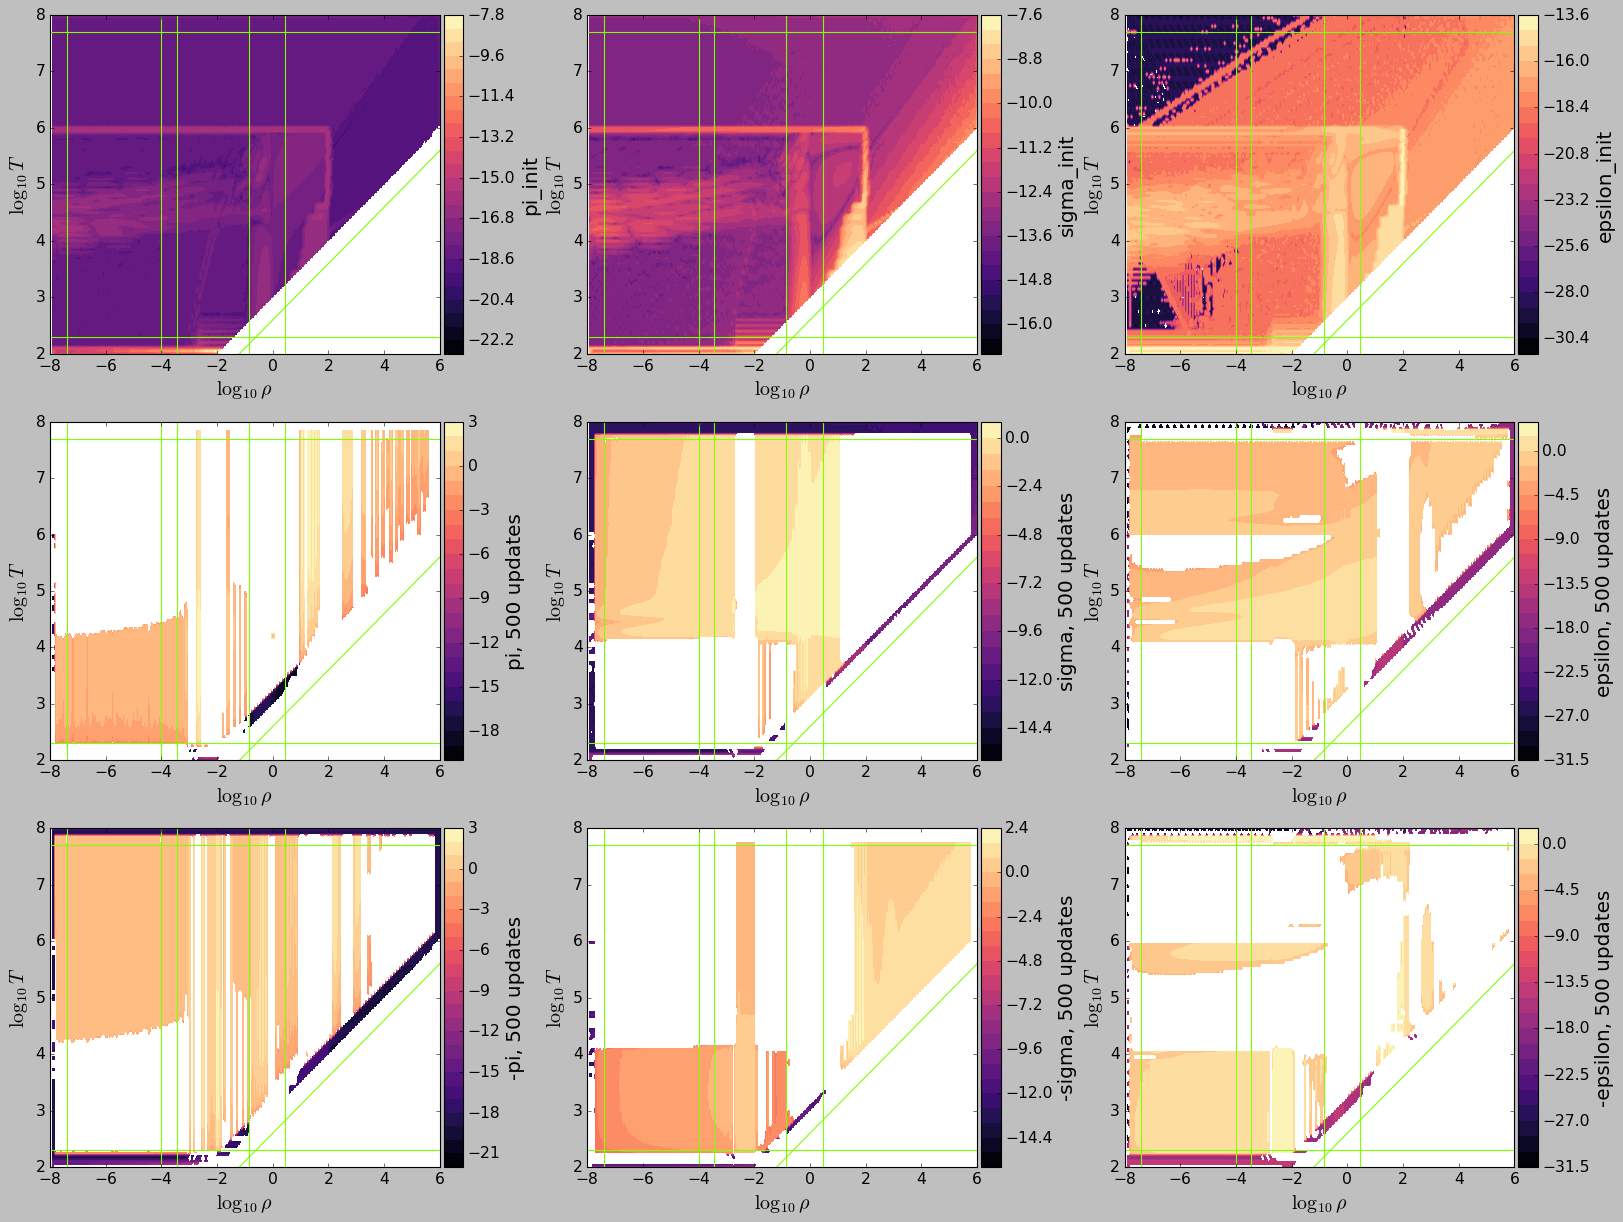

In [6]:
#pi_, sigma_, epsilon_ = naive_grid_update(perturbed, 10**perturbed.log10Pgrid,10**perturbed.log10Sgrid,10**perturbed.log10Ugrid, 
#                                          species='H', ic='oom',nUpdates=50,gaussian_blur_sigma=1,soften=1.e-20, plot=True)
pi_, sigma_, epsilon_ = naive_grid_update(toy, 10**toy.log10Pgrid,10**toy.log10Sgrid,10**toy.log10Ugrid, 
                                          species='H', ic='oom',nUpdates=500,gaussian_blur_sigma=1,soften=1.e-20, plot=True)


/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_83613/442481671.py:4: RuntimeWarning: invalid value encountered in log10
  zs=[np.log10(pi_),np.log10(-pi_)],


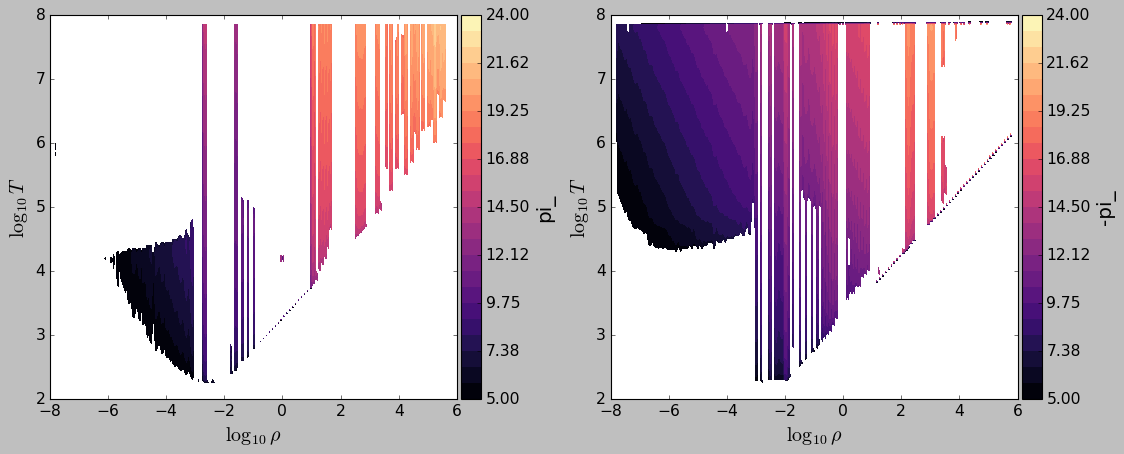

In [7]:
meos.contourf_sublots_with_colorbars(nRow=1, nCol=2, 
                                xs=[toy.log10rhogrid,toy.log10rhogrid],
                                ys=[toy.log10Tgrid,toy.log10Tgrid],
                                zs=[np.log10(pi_),np.log10(-pi_)],
                                xlims=[(-8,6),(-8,6)], 
                                ylims=[(2,8),(2,8)], 
                                zlims=[(5,24),(5,24)],
                                levels=[25,25], 
                                xlabels=[r'$\log_{10}\rho$',r'$\log_{10}\rho$'],
                                ylabels=[r'$\log_{10}T$',r'$\log_{10}T$'],
                                zlabels=['pi_','-pi_'],
                                cmap='magma', vlines=None, hlines=None, otherlines_x=None, otherlines_y=None, savename=None)



/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_83613/1834427685.py:4: RuntimeWarning: invalid value encountered in log10
  zs=[np.log10(sigma_),np.log10(-sigma_)],


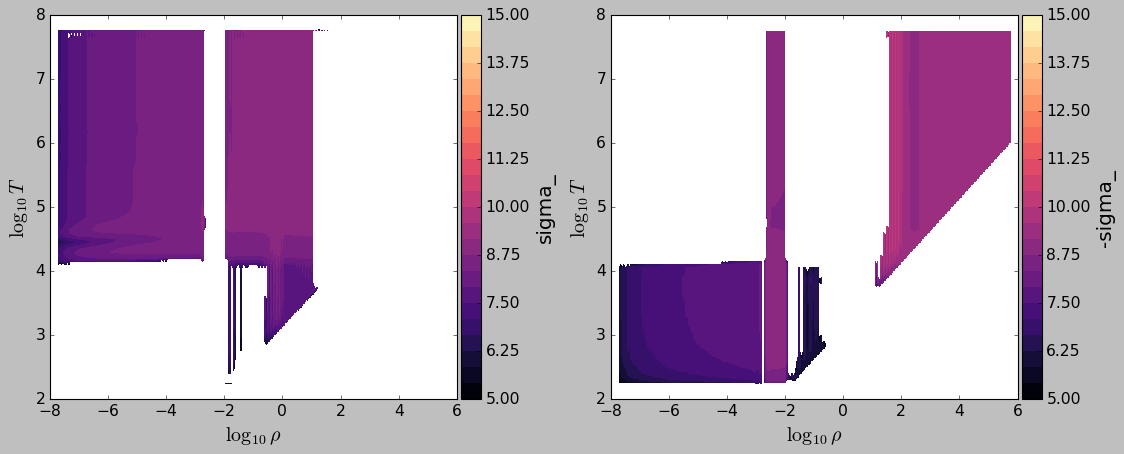

In [8]:
meos.contourf_sublots_with_colorbars(nRow=1, nCol=2, 
                                xs=[toy.log10rhogrid,toy.log10rhogrid],
                                ys=[toy.log10Tgrid,toy.log10Tgrid],
                                zs=[np.log10(sigma_),np.log10(-sigma_)],
                                xlims=[(-8,6),(-8,6)], 
                                ylims=[(2,8),(2,8)], 
                                zlims=[(5,15),(5,15)],
                                levels=[25,25], 
                                xlabels=[r'$\log_{10}\rho$',r'$\log_{10}\rho$'],
                                ylabels=[r'$\log_{10}T$',r'$\log_{10}T$'],
                                zlabels=['sigma_','-sigma_'],
                                cmap='magma', vlines=None, hlines=None, otherlines_x=None, otherlines_y=None, savename=None)



/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_83613/1623718348.py:4: RuntimeWarning: divide by zero encountered in log10
  zs=[np.log10(epsilon_),np.log10(-epsilon_)],
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_83613/1623718348.py:4: RuntimeWarning: invalid value encountered in log10
  zs=[np.log10(epsilon_),np.log10(-epsilon_)],


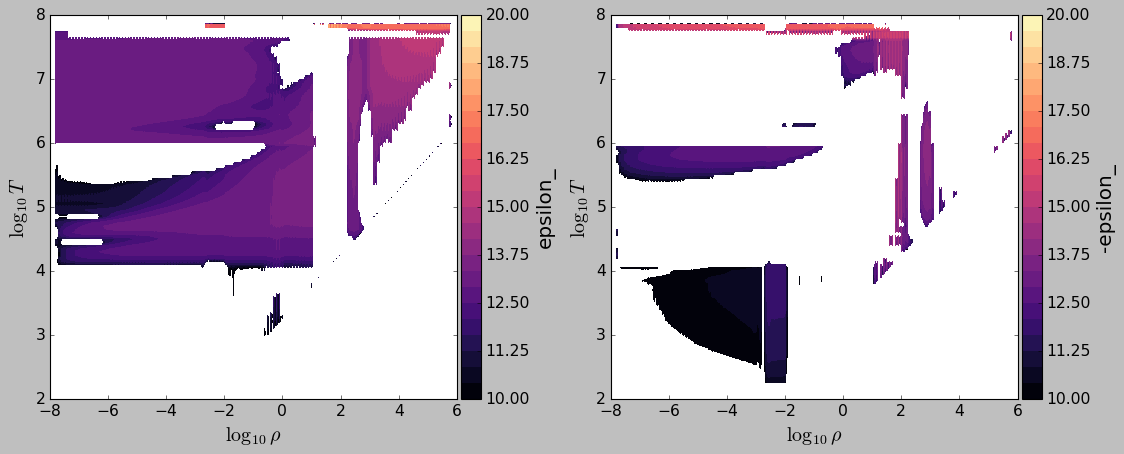

In [9]:
meos.contourf_sublots_with_colorbars(nRow=1, nCol=2, 
                                xs=[toy.log10rhogrid,toy.log10rhogrid],
                                ys=[toy.log10Tgrid,toy.log10Tgrid],
                                zs=[np.log10(epsilon_),np.log10(-epsilon_)],
                                xlims=[(-8,6),(-8,6)], 
                                ylims=[(2,8),(2,8)], 
                                zlims=[(10,20),(10,20)],
                                levels=[25,25], 
                                xlabels=[r'$\log_{10}\rho$',r'$\log_{10}\rho$'],
                                ylabels=[r'$\log_{10}T$',r'$\log_{10}T$'],
                                zlabels=['epsilon_','-epsilon_'],
                                cmap='magma', vlines=None, hlines=None, otherlines_x=None, otherlines_y=None, savename=None)



In [10]:
#P_adj = 10**perturbed.log10Pgrid + pi_
#S_adj = 10**perturbed.log10Sgrid + sigma_
#E_adj = 10**perturbed.log10Ugrid + epsilon_
P_adj = 10**toy.log10Pgrid + pi_
S_adj = 10**toy.log10Sgrid + sigma_
E_adj = 10**toy.log10Ugrid + epsilon_

/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_83613/3471755269.py:1: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.ravel(np.log10(pi_)),density=True,color='b',range=(5,30),bins=30)
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_83613/3471755269.py:2: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.ravel(np.log10(-pi_)),density=True,color='r',range=(5,30),bins=30,alpha=0.5)


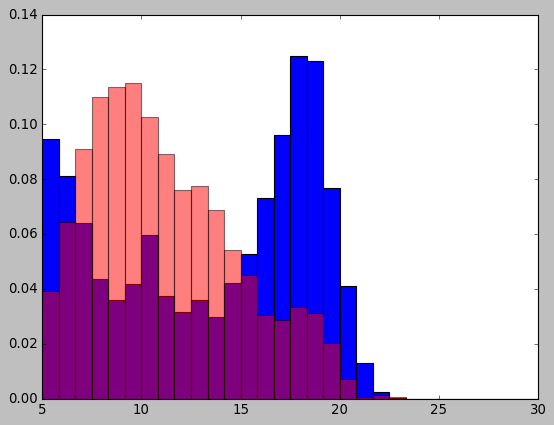

In [11]:
plt.hist(np.ravel(np.log10(pi_)),density=True,color='b',range=(5,30),bins=30)
plt.hist(np.ravel(np.log10(-pi_)),density=True,color='r',range=(5,30),bins=30,alpha=0.5)
plt.show()

In [12]:
print(len(P_adj[P_adj < 0])/len(np.ravel(P_adj)))
print(len(S_adj[S_adj < 0])/len(np.ravel(E_adj)))
print(len(E_adj[E_adj < 0])/len(np.ravel(S_adj)))

0.1262904032234346
0.17017146554513102
0.04061645245728067


/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:714: RuntimeWarning: invalid value encountered in log10
  cs00 = axes[0].contourf(plot_rho, plot_T, np.log10(plot_P), shading='nearest', cmap='magma', levels=np.linspace(0,30,20))
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:719: RuntimeWarning: invalid value encountered in log10
  cs01 = axes[1].contourf(plot_rho, plot_T, np.log10(plot_S), shading='nearest', cmap='magma',levels=np.linspace(6,10,20))
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:724: RuntimeWarning: invalid value encountered in log10
  cs02 = axes[2].contourf(plot_rho, plot_T, np.log10(plot_E), shading='nearest', cmap='magma',levels=np.linspace(9,20,20))


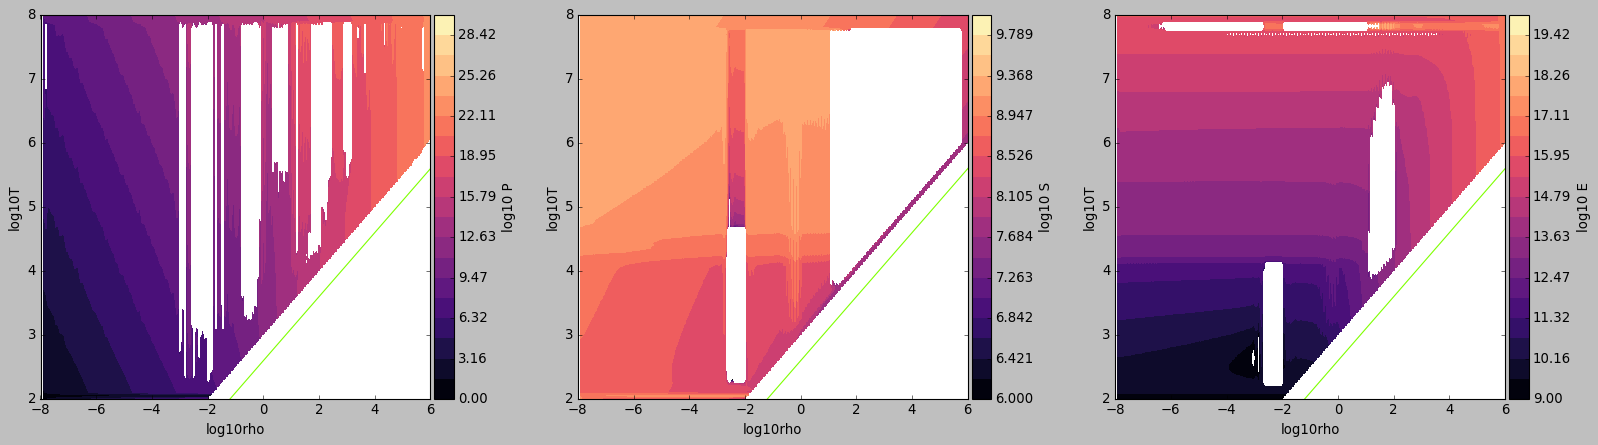

In [13]:
#meos.plot_PSE(perturbed, P_adj,S_adj,E_adj)
meos.plot_PSE(toy, P_adj,S_adj,E_adj)


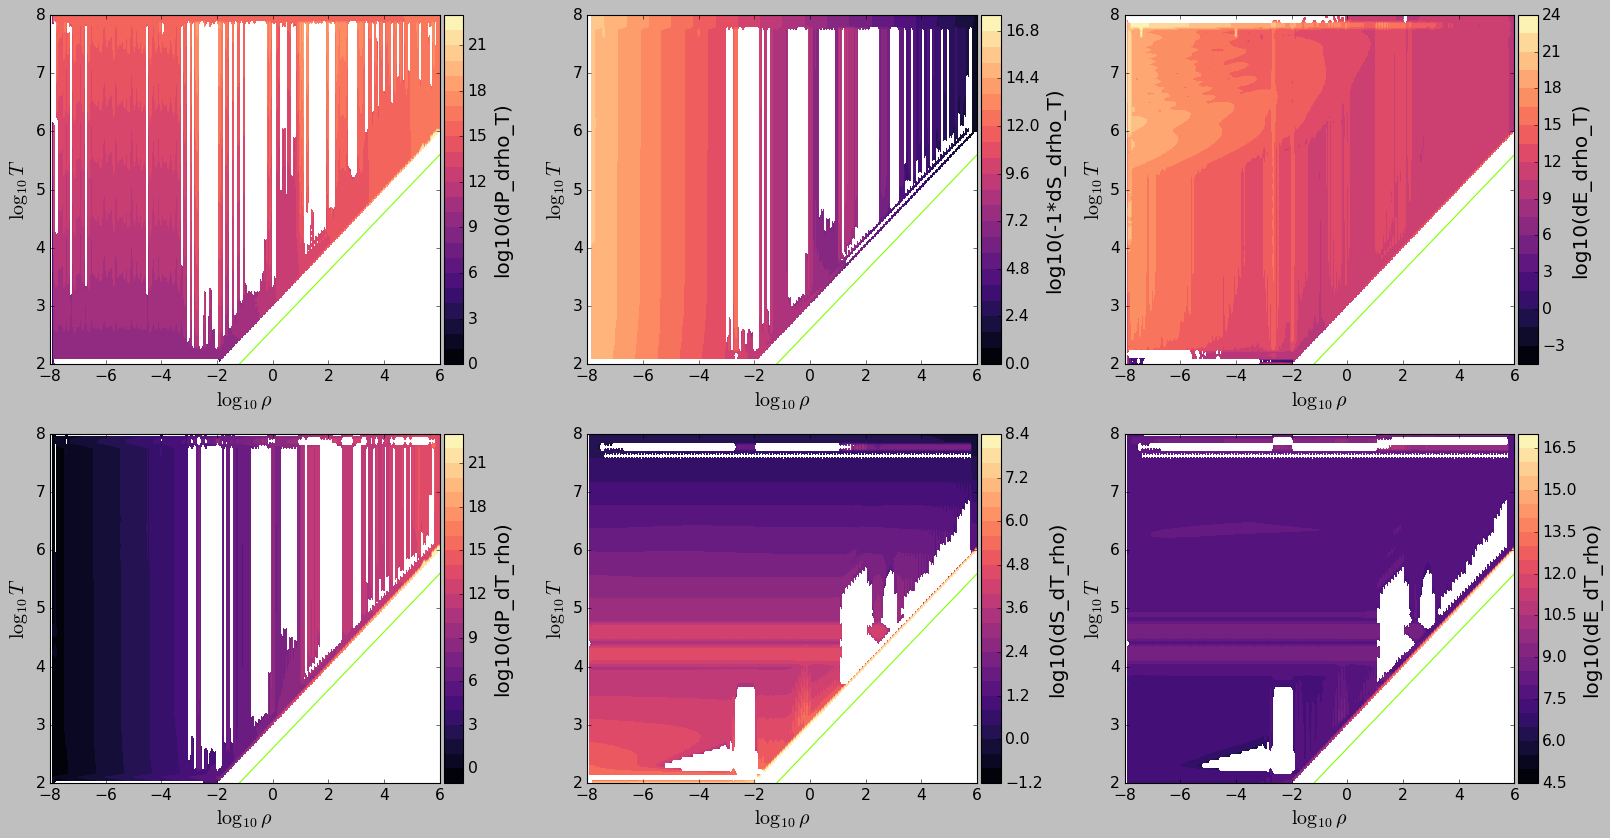

In [14]:
#H_dP_drho_T_1, H_dS_drho_T_1, H_dE_drho_T_1, H_dP_dT_rho_1, H_dS_dT_rho_1, H_dE_dT_rho_1 =  meos.finite_difference(perturbed, P_adj, S_adj, E_adj,
#                                                                                                  species='H', maskUnphysicalRegion=True, plot=True, savename=None)
H_dP_drho_T_1, H_dS_drho_T_1, H_dE_drho_T_1, H_dP_dT_rho_1, H_dS_dT_rho_1, H_dE_dT_rho_1 =  meos.finite_difference(toy, P_adj, S_adj, E_adj,
                                                                                                  species='H', maskUnphysicalRegion=True, plot=True, savename=None)


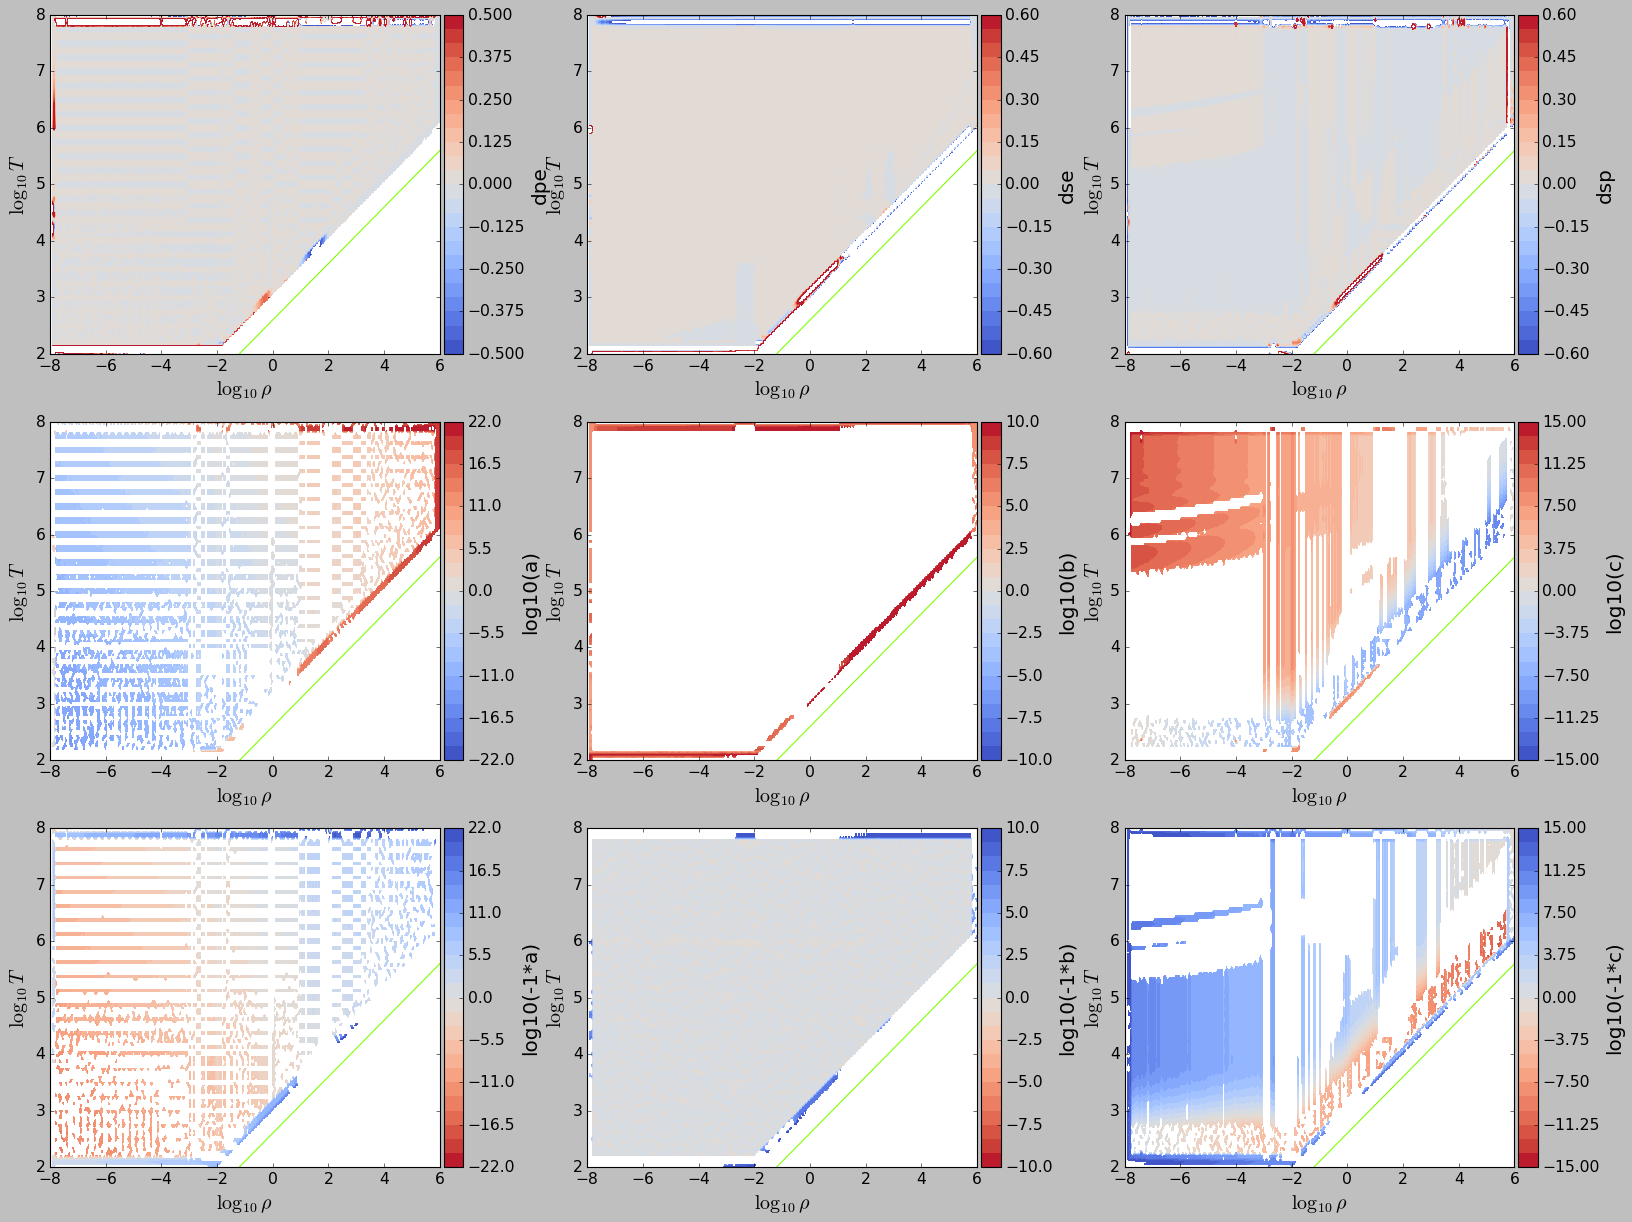

In [15]:
#H_dpe_1, H_dse_1, H_dsp_1, H_a_1, H_b_1, H_c_1 = meos.consistency_metrics(perturbed, P_adj, S_adj, E_adj,H_dP_drho_T_1, H_dS_drho_T_1, H_dE_drho_T_1, H_dP_dT_rho_1, H_dS_dT_rho_1, H_dE_dT_rho_1,species='H',maskUnphysicalRegion=True,plot=True, savename=None)

H_dpe_1, H_dse_1, H_dsp_1, H_a_1, H_b_1, H_c_1 = meos.consistency_metrics(toy, P_adj, S_adj, E_adj,H_dP_drho_T_1, H_dS_drho_T_1, H_dE_drho_T_1, H_dP_dT_rho_1, H_dS_dT_rho_1, H_dE_dT_rho_1,species='H',maskUnphysicalRegion=True,plot=True, savename=None)


/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_83613/1391602326.py:4: RuntimeWarning: divide by zero encountered in log10
  zs=[np.log10(H_dpe_1),np.log10(-H_dpe_1)],
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_83613/1391602326.py:4: RuntimeWarning: invalid value encountered in log10
  zs=[np.log10(H_dpe_1),np.log10(-H_dpe_1)],


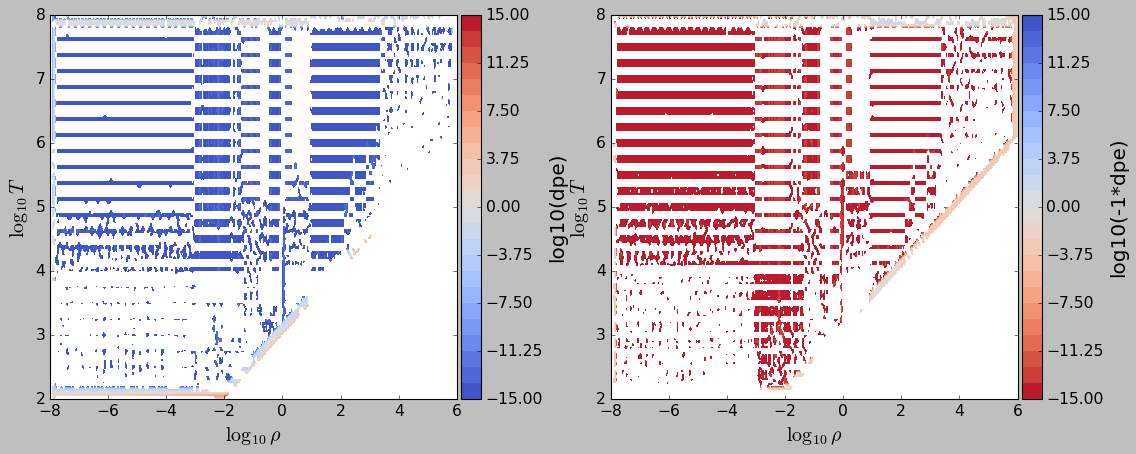

In [16]:
meos.contourf_sublots_with_colorbars(nRow=1, nCol=2, 
                                xs=[toy.log10rhogrid,toy.log10rhogrid],
                                ys=[toy.log10Tgrid,toy.log10Tgrid],
                                zs=[np.log10(H_dpe_1),np.log10(-H_dpe_1)],
                                xlims=[(-8,6),(-8,6)], 
                                ylims=[(2,8),(2,8)], 
                                zlims=[(-15,15),(-15,15)],
                                levels=[25,25], 
                                xlabels=[r'$\log_{10}\rho$',r'$\log_{10}\rho$'],
                                ylabels=[r'$\log_{10}T$',r'$\log_{10}T$'],
                                zlabels=['log10(dpe)','log10(-1*dpe)'],
                                cmap=['coolwarm','coolwarm_r'], vlines=None, hlines=None, otherlines_x=None, otherlines_y=None, savename=None)



/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_83613/2104460809.py:4: RuntimeWarning: divide by zero encountered in log10
  zs=[np.log10(H_dsp_1),np.log10(-H_dsp_1)],
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_83613/2104460809.py:4: RuntimeWarning: invalid value encountered in log10
  zs=[np.log10(H_dsp_1),np.log10(-H_dsp_1)],


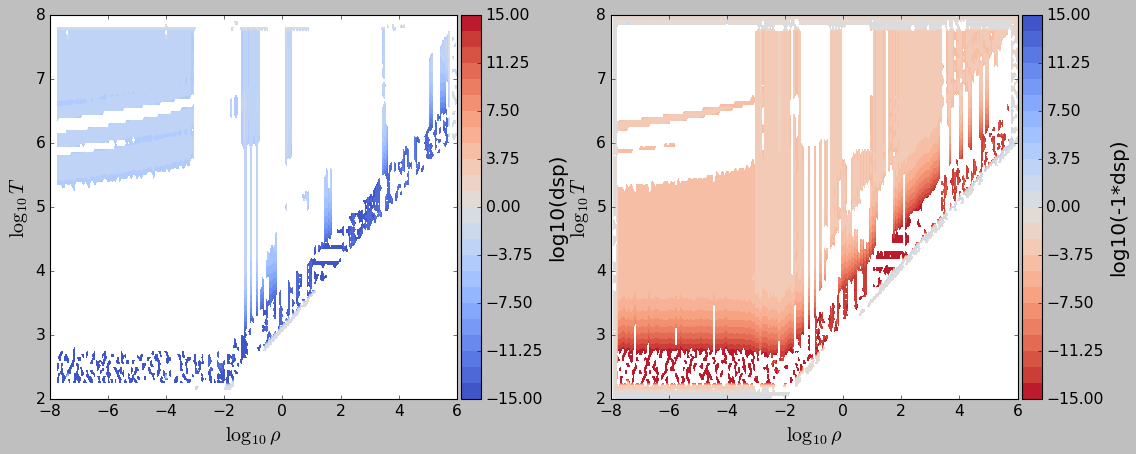

-6.583203657894998e-05


/opt/anaconda3/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:867: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [17]:
meos.contourf_sublots_with_colorbars(nRow=1, nCol=2, 
                                xs=[toy.log10rhogrid,toy.log10rhogrid],
                                ys=[toy.log10Tgrid,toy.log10Tgrid],
                                zs=[np.log10(H_dsp_1),np.log10(-H_dsp_1)],
                                xlims=[(-8,6),(-8,6)], 
                                ylims=[(2,8),(2,8)], 
                                zlims=[(-15,15),(-15,15)],
                                levels=[25,25], 
                                xlabels=[r'$\log_{10}\rho$',r'$\log_{10}\rho$'],
                                ylabels=[r'$\log_{10}T$',r'$\log_{10}T$'],
                                zlabels=['log10(dsp)','log10(-1*dsp)'],
                                cmap=['coolwarm','coolwarm_r'], vlines=None, hlines=None, otherlines_x=None, otherlines_y=None, savename=None)

print(np.median(H_dsp_1))

In [18]:
print(np.median(H_dpe_1))
print(np.median(H_dse_1))
print(np.median(H_dsp_1))

6.661338147750939e-16
1.1049203774149419e-08
-6.583203657894998e-05


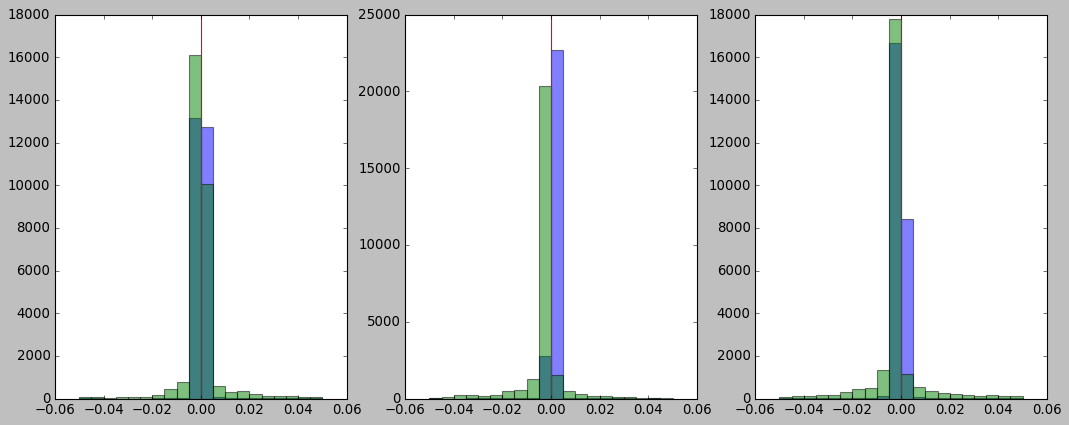

In [19]:
fig, axes = plt.subplots(1,3,figsize=(16,6))
axes[0].hist(np.ravel(H_dpe_1),range=(-0.05,0.05),alpha=0.5,bins=20,color='b')
axes[0].hist(np.ravel(dpe),range=(-0.05,0.05),bins=20,alpha=0.5,color='g')
#axes[0].hist(np.ravel(per_dpe),range=(-0.05,0.05),bins=20,alpha=0.5,color='r')
axes[1].hist(np.ravel(H_dse_1),range=(-0.05,0.05),alpha=0.5,bins=20,color='b')
axes[1].hist(np.ravel(dse),range=(-0.05,0.05),bins=20,alpha=0.5,color='g')
#axes[1].hist(np.ravel(per_dse),range=(-0.05,0.05),bins=20,alpha=0.5,color='r')
axes[2].hist(np.ravel(H_dsp_1),range=(-0.05,0.05),alpha=0.5,bins=20,color='b')
axes[2].hist(np.ravel(dsp),range=(-0.05,0.05),bins=20,alpha=0.5,color='g')
#axes[2].hist(np.ravel(per_dsp),range=(-0.05,0.05),bins=20,alpha=0.5,color='r')

for ax in axes:
    ax.axvline(0.,color='r')
plt.show()

/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_83613/3277758802.py:4: RuntimeWarning: invalid value encountered in log10
  zs=[np.log10(P_adj/10**toy.log10Pgrid),np.log10(S_adj/10**toy.log10Sgrid),np.log10(E_adj/10**toy.log10Ugrid),
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_83613/3277758802.py:5: RuntimeWarning: invalid value encountered in log10
  np.log10(-P_adj/10**toy.log10Pgrid),np.log10(-S_adj/10**toy.log10Sgrid),np.log10(-E_adj/10**toy.log10Ugrid)],


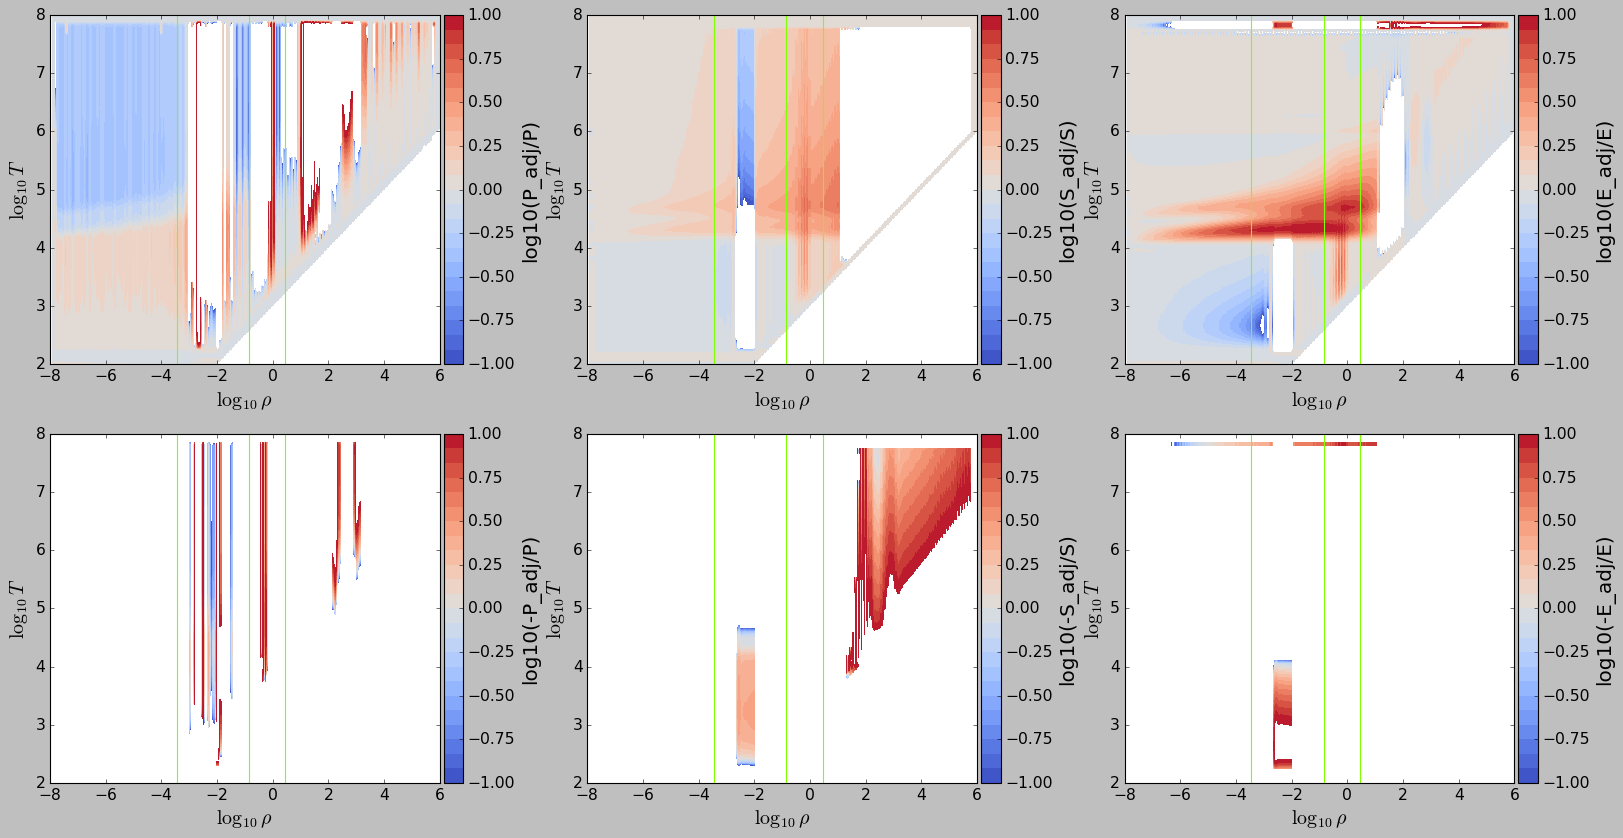

In [20]:
meos.contourf_sublots_with_colorbars(nRow=2, nCol=3, 
                                xs=[toy.log10rhogrid,toy.log10rhogrid,toy.log10rhogrid,toy.log10rhogrid,toy.log10rhogrid,toy.log10rhogrid],
                                ys=[toy.log10Tgrid,toy.log10Tgrid,toy.log10Tgrid,toy.log10Tgrid,toy.log10Tgrid,toy.log10Tgrid],
                                zs=[np.log10(P_adj/10**toy.log10Pgrid),np.log10(S_adj/10**toy.log10Sgrid),np.log10(E_adj/10**toy.log10Ugrid),
                                   np.log10(-P_adj/10**toy.log10Pgrid),np.log10(-S_adj/10**toy.log10Sgrid),np.log10(-E_adj/10**toy.log10Ugrid)],
                                xlims=[(-8,6),(-8,6),(-8,6),(-8,6),(-8,6),(-8,6)], 
                                ylims=[(2,8),(2,8),(2,8),(2,8),(2,8),(2,8)], 
                                zlims=[(-1,1),(-1,1),(-1,1),(-1,1),(-1,1),(-1,1)],
                                levels=[25,25,25,25,25,25], 
                                xlabels=[r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$'],
                                ylabels=[r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$'],
                                zlabels=['log10(P_adj/P)','log10(S_adj/S)','log10(E_adj/E)','log10(-P_adj/P)','log10(-S_adj/S)','log10(-E_adj/E)'],
                                cmap='coolwarm', vlines=[-3.45,-0.85,0.45], hlines=None, otherlines_x=None, otherlines_y=None, savename=None)


# making eqns dimensionless & working in logarithmic terms
# note that now,  P_adj = pi * P'; S_adj = sigma * S' ; E_adj = epsilon * E'


In [318]:
def naive_grid_update_multiplicative(CMStable, P,S,E, species='H', ic='oom', plot=False, nUpdates=1, gaussian_blur_sigma=1, soften=1):
    log10rho = CMStable.log10rhogrid
    log10T = CMStable.log10Tgrid

    #print(log10rho)
    #print(log10T)
    
    rho = 10**CMStable.log10rhogrid
    T = 10**CMStable.log10Tgrid

    grid_rho = rho[:,0]
    grid_T = T[0]

    grid_log10rho = log10rho[:,0]
    grid_log10T = log10T[0]

    nrho = len(grid_rho)
    nT = len(grid_T)

    P_init = copy.deepcopy(P)
    S_init = copy.deepcopy(S)
    E_init = copy.deepcopy(E)

    ln_P = np.log(P)
    ln_S = np.log(S)
    ln_E = np.log(E)

    dP_drho_T, dS_drho_T, dE_drho_T, dP_dT_rho, dS_dT_rho, dE_dT_rho = meos.finite_difference(CMStable,P_init,S_init,E_init,species,maskUnphysicalRegion=True,plot=False,savename=None)
   
    dpe, dse, dsp, a, b, c = meos.consistency_metrics(CMStable,P_init,S_init,E_init,dP_drho_T, dS_drho_T, dE_drho_T, dP_dT_rho, dS_dT_rho, dE_dT_rho,species,maskUnphysicalRegion=True,plot=False,savename=None)
    
    if ic == 'random':
        np.random.seed(200)
        scale = 1.e-5

        ln_pi_mat_init = np.random.normal(loc=0.,scale=scale,size=(nrho,nT))
        ln_sigma_mat_init = np.random.normal(loc=0.,scale=scale,size=(nrho,nT))
        ln_epsilon_mat_init = np.random.normal(loc=0.,scale=scale,size=(nrho,nT))
        
        # make sure masked
        ln_pi_mat_init = ln_pi_mat_init + dpe - dpe
        ln_sigma_mat_init = ln_sigma_mat_init + dpe - dpe
        ln_epsilon_mat_init = ln_epsilon_mat_init + dpe - dpe

    if ic == 'small':
        ln_pi_mat_init = 1.e-5*np.ones_like(dpe)
        ln_sigma_mat_init = 1.e-5*np.ones_like(dpe)
        ln_epsilon_mat_init = 1.e-5*np.ones_like(dpe)
   
    del_log10rho = 0.05
    del_log10T = 0.05

    ln_epsilon_mat = copy.deepcopy(ln_epsilon_mat_init)
    ln_sigma_mat = copy.deepcopy(ln_sigma_mat_init)
    ln_pi_mat = copy.deepcopy(ln_pi_mat_init)

    log10rho_masked = np.round(log10rho + dpe - dpe, 2)
    log10T_masked = np.round(log10T + dpe - dpe, 2)

    grid_log10rho_masked = np.sort(np.unique(log10rho_masked.filled(fill_value=np.nan)))
    grid_log10T_masked = np.sort(np.unique(log10T_masked.filled(fill_value=np.nan)))

    grid_log10rho_masked = grid_log10rho_masked[~np.isnan(grid_log10rho_masked)]
    grid_log10T_masked = grid_log10T_masked[~np.isnan(grid_log10T_masked)]

    nrho_masked = len(grid_log10rho_masked)
    nT_masked = len(grid_log10T_masked)
    
    upper_i = np.arange(len(grid_log10rho))[grid_log10rho == grid_log10rho_masked[0]] + 10
    lower_i = np.arange(len(grid_log10rho))[grid_log10rho == grid_log10rho_masked[-1]] - 200
    left_j = np.arange(len(grid_log10T))[grid_log10T == grid_log10T_masked[0]] + 6
    right_j = np.arange(len(grid_log10T))[grid_log10T == grid_log10T_masked[-1]] - 6
    
    for k in range(nUpdates):
        small = 1.e-5
        # boundary conditions
        ln_sigma_mat[upper_i, left_j] = small #sigma_mat_init[upper_i, left_j]
        ln_sigma_mat[upper_i, right_j] = small #sigma_mat_init[upper_i, right_j]
        ln_sigma_mat[lower_i, left_j] = small #sigma_mat_init[lower_i, left_j]
        ln_sigma_mat[lower_i, right_j] = small #sigma_mat_init[lower_i, right_j]

        ln_epsilon_mat[upper_i, left_j] = small #epsilon_mat_init[upper_i, left_j]
        ln_epsilon_mat[upper_i, right_j] = small #epsilon_mat_init[upper_i, right_j]
        ln_epsilon_mat[lower_i, left_j] = small #epsilon_mat_init[lower_i, left_j]
        ln_epsilon_mat[lower_i, right_j] = small #epsilon_mat_init[lower_i, right_j]

        ln_pi_mat[upper_i, left_j] = small #pi_mat_init[upper_i, left_j]
        ln_pi_mat[upper_i, right_j] = small #pi_mat_init[upper_i, right_j]
        ln_pi_mat[lower_i, left_j] = small #pi_mat_init[lower_i, left_j]
        ln_pi_mat[lower_i, right_j] = small #pi_mat_init[lower_i, right_j]
        
        for i in range(4,nrho-4):
            min_j = np.argmin(log10T_masked[i])
            for j in range(min_j+4,nT-4):
                two_del_lnrho = 2 * np.log(rho[i,j]) * del_log10rho
                two_del_lnT = 2 * np.log(T[i,j]) * del_log10T

                eij = np.exp(ln_epsilon_mat[i,j])
                pij = np.exp(ln_pi_mat[i,j])
                '''
                ln_pi_mat[i, j+1] = (ln_pi_mat[i, j-1] +
                                     two_del_lnT * 
                                     ( (rho[i,j]*E[i,j]/P[i,j])*( (1 - (eij/pij))*((ln_E[i+1,j] - ln_E[i-1,j])/two_del_lnrho) 
                                                                  - (eij/pij)*((ln_epsilon_mat[i+1,j]-ln_epsilon_mat[i-1,j])/two_del_lnrho) ) 
                                       - dpe[i,j] ))
                '''
                #print(i,j)
                #print(ln_pi_mat[i,j])
                #print(ln_pi_mat[i,j-1])
                pij_new =  ( ( (two_del_lnT * rho[i,j] * E[i,j])/( (dpe[i,j]*two_del_lnT + ln_pi_mat[i,j+1] - ln_pi_mat[i,j-1]) * P[i,j] * two_del_lnrho) ) * 
                             ( (pij - eij)*(ln_E[i+1,j] - ln_E[i-1,j]) - eij*(ln_epsilon_mat[i+1,j] - ln_epsilon_mat[i-1,j]) ) )

                #print(pij_new, np.log(pij_new))
                if pij_new <= 0. or pij_new >= 10. :
                    pij_new =0.01 + np.random.normal(loc=0,scale=1.e-3)
                        
                ln_pi_mat[i,j] = np.log(pij_new)
                
        for i in range(4,nrho-4):
            min_j = np.argmin(log10T_masked[i])
            for j in range(min_j+4,nT-4):
                two_del_lnrho = 2 * np.log(rho[i,j]) * del_log10rho
                two_del_lnT = 2 * np.log(T[i,j]) * del_log10T

                eij = np.exp(ln_epsilon_mat[i,j])
                sij = np.exp(ln_sigma_mat[i,j])

                '''
                ln_epsilon_mat[i,j+1] = ( ln_epsilon_mat[i,j-1] + 
                (sij/eij)*two_del_lnT * 
                ( (-1*T[i,j]*S[i,j]/E[i,j])*((ln_sigma_mat[i,j+1] - ln_sigma_mat[i,j-1])/two_del_lnT) 
                         - ((ln_E[i,j+1] - ln_E[i,j-1])/two_del_lnT)*(dse[i,j] + 1 - (eij/sij)) ) )
                '''
                
                eij_new = (((sij*two_del_lnT)/(ln_epsilon_mat[i,j+1] - ln_epsilon_mat[i,j-1])) * 
                       ( (-1*T[i,j]*S[i,j]/E[i,j])*((ln_sigma_mat[i,j+1] - ln_sigma_mat[i,j-1])/two_del_lnT) 
                         - ((ln_E[i,j+1] - ln_E[i,j-1])/two_del_lnT)*(dse[i,j] + 1 - (eij/sij)) ))

                if eij_new <= 0. or eij_new >= 10.:
                    eij_new = 0.01 + np.random.normal(loc=0,scale=1.e-3)
                
                ln_epsilon_mat[i, j] = np.log(eij_new)
              
        for j in range(65,nT-4):
            #print(j)
            max_i = np.argmax(log10rho_masked[:,j]) 
            for i in range(4,max_i-4):
                #print(i,j)
                two_del_lnrho = 2 * np.log(rho[i,j]) * del_log10rho
                two_del_lnT = 2 * np.log(T[i,j]) * del_log10T

                pij = np.exp(ln_pi_mat[i,j])
                sij = np.exp(ln_sigma_mat[i,j])
                '''
                ln_sigma_mat[i+1,j] = ( ln_sigma_mat[i-1, j]  + 
                                        ((two_del_lnrho * P[i,j])/(T[i,j] * rho[i,j] * S[i,j])) * 
                                        ((pij/sij) * 
                                         ((ln_pi_mat[i,j+1] - ln_pi_mat[i,j-1])/two_del_lnT) - 
                                         ((ln_P[i,j+1] - ln_P[i,j-1])/two_del_lnT) * 
                                         (dsp[i,j] + 1 - (pij/sij))) )
                '''
                sip1j = np.exp(ln_sigma_mat[i+1,j])
                sim1j = np.exp(ln_sigma_mat[i-1,j])

                denom = ((T[i,j] * rho[i,j] * S[i,j])/P[i,j]) * ((sip1j - sim1j)/(two_del_lnrho)) + ((ln_P[i,j+1] - ln_P[i,j-1])/(two_del_lnT))*(dsp[i,j] + 1 - (pij/sij))
                sij_new = pij * ((ln_pi_mat[i,j+1] - ln_pi_mat[i,j-1])/two_del_lnT) * (1./denom)
                #print(i,j)
                #print(type(sij_new),type(ln_P[i,j+1]),type(ln_P[i,j-1]))
                
                if sij_new <= 0. or sij_new >= 10. or np.isfinite(sij_new) is False:
                    sij_new = 0.01 + np.random.normal(loc=0,scale=1.e-3)

                ##print(sij_new)
                ln_sigma_mat[i,j] = np.log(sij_new)
                
        

    if plot is True:
        plot_line_x = np.linspace(-8,8,100)
        plot_line_y = 3.3 + (1./2.)*plot_line_x + np.log10(CMStable.atomic_number) - (5./3)*np.log10(CMStable.mass_number)

        meos.contourf_sublots_with_colorbars(nRow=2, nCol=3, 
                                xs=[log10rho,log10rho,log10rho,log10rho,log10rho,log10rho],
                                ys=[log10T,log10T,log10T,log10T,log10T,log10T],
                                #zs=[pi_mat_init/P, sigma_mat_init/S, epsilon_mat_init/E,
                                #    pi_mat/P, sigma_mat/S, epsilon_mat/E],
                                zs=[ln_pi_mat_init, ln_sigma_mat_init, ln_epsilon_mat_init,
                                    ln_pi_mat, ln_sigma_mat, ln_epsilon_mat],
                                xlims=[(-8,6),(-8,6),(-8,6),(-8,6),(-8,6),(-8,6)], 
                                ylims=[(2,8),(2,8),(2,8),(2,8),(2,8),(2,8)], 
                                zlims=None,#[(9,17),(1,17),(8,20),(0,15),(0,6),(7,10)], 
                                #levels=[25,25,25,25,25,25], 
                                levels=[25,25,25,None,None,None],
                                xlabels=[r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$'],
                                ylabels=[r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$'],
                                zlabels=['ln_pi_init','ln_sigma_init','ln_epsilon_init','ln_pi, {0} updates'.format(nUpdates),'ln_sigma, {0} updates'.format(nUpdates),'ln_epsilon, {0} updates'.format(nUpdates)],
                                cmap='magma', vlines=[log10rho[upper_i,0],log10rho[lower_i,0]], hlines=[log10T[0,left_j],log10T[0,right_j]], otherlines_x=[plot_line_x], otherlines_y=[plot_line_y], savename=None)
    pi_mat = np.exp(ln_pi_mat)
    sigma_mat = np.exp(ln_sigma_mat)
    epsilon_mat = np.exp(ln_epsilon_mat)
    
    return pi_mat, sigma_mat, epsilon_mat

/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_79816/3437028332.py:117: RuntimeWarning: divide by zero encountered in log
  ln_pi_mat[i,j] = np.log(pij_new)
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_79816/3437028332.py:135: RuntimeWarning: divide by zero encountered in scalar divide
  eij_new = (((sij*two_del_lnT)/(ln_epsilon_mat[i,j+1] - ln_epsilon_mat[i,j-1])) *
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_79816/3437028332.py:166: RuntimeWarning: invalid value encountered in scalar subtract
  sij_new = pij * ((ln_pi_mat[i,j+1] - ln_pi_mat[i,j-1])/two_del_lnT) * (1./denom)
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_79816/3437028332.py:166: RuntimeWarning: invalid value encountered in scalar multiply
  sij_new = pij * ((ln_pi_mat[i,j+1] - ln_pi_mat[i,j-1])/two_del_lnT) * (1./denom)
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_79816/3437028332.py:110: RuntimeWarning: invalid value encountered in scalar subtract
  p

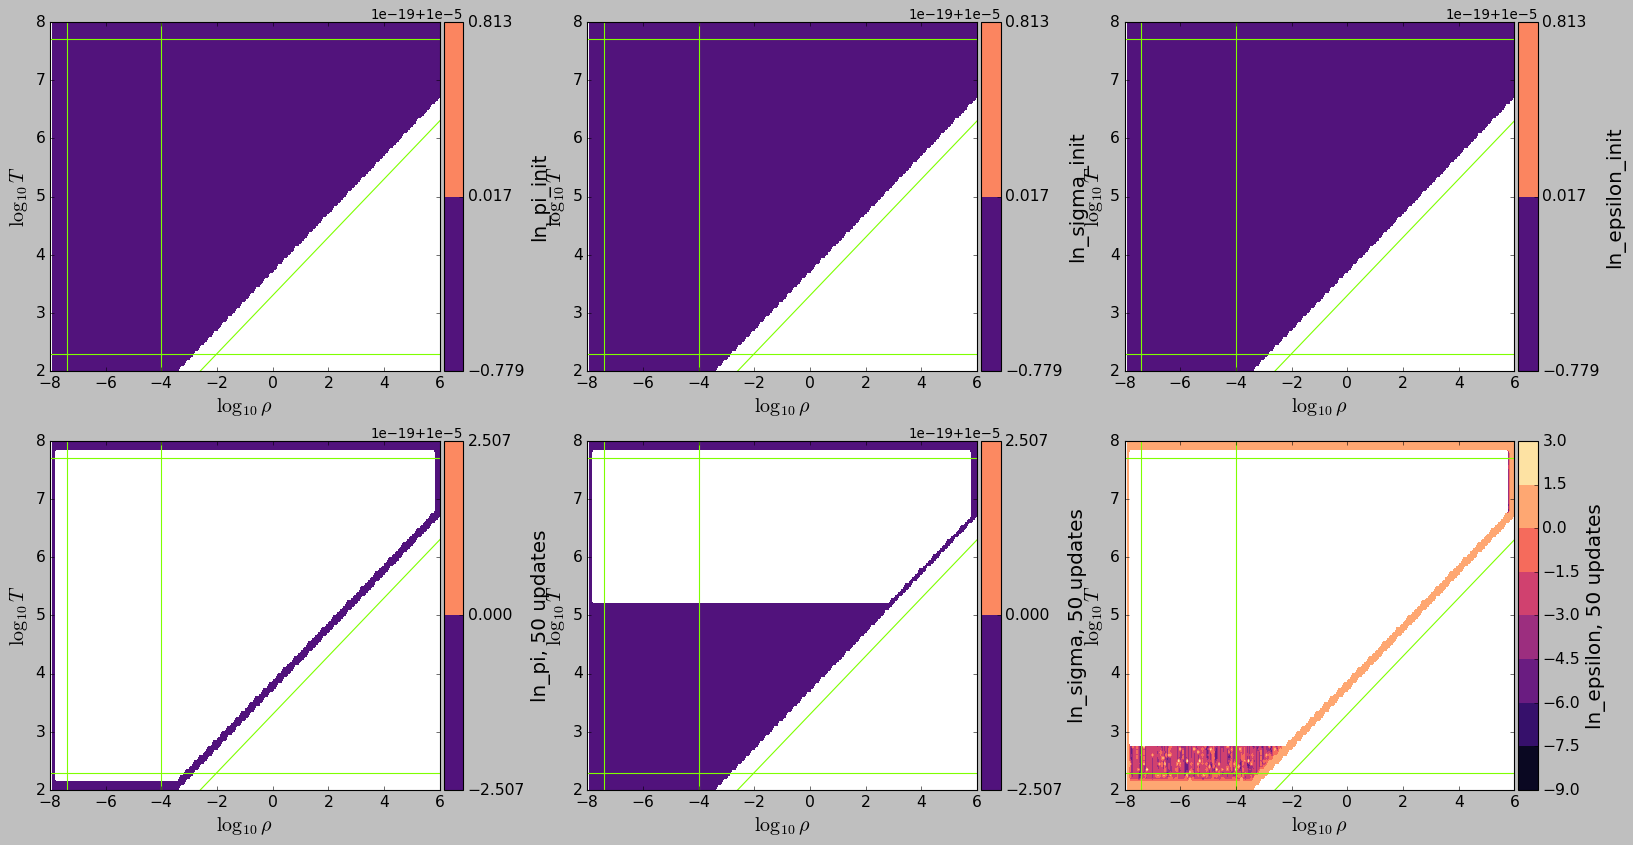

In [71]:
#pi_, sigma_, epsilon_ = naive_grid_update_multiplicative(perturbed, 10**perturbed.log10Pgrid,10**perturbed.log10Sgrid,10**perturbed.log10Ugrid, species='H', ic='random',nUpdates=50,gaussian_blur_sigma=1,soften=1.e-20, plot=True)
pi_, sigma_, epsilon_ = naive_grid_update_multiplicative(toy, 10**toy.log10Pgrid,10**toy.log10Sgrid,10**toy.log10Ugrid, species='H', ic='small',nUpdates=50,gaussian_blur_sigma=1,soften=1.e-20, plot=True)


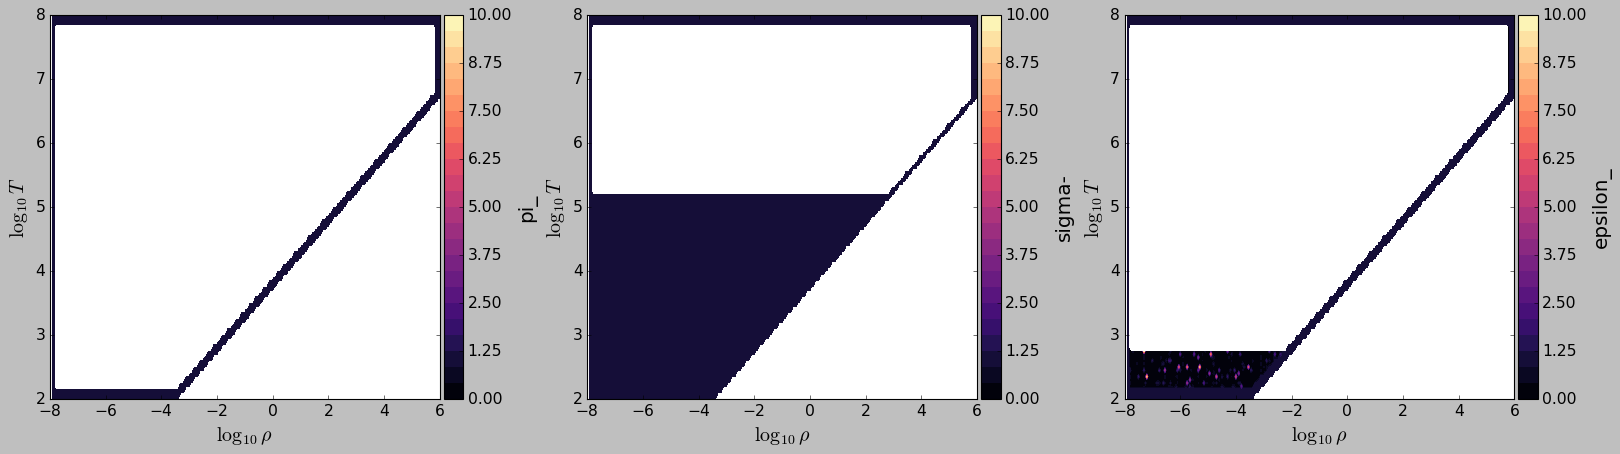

In [72]:
meos.contourf_sublots_with_colorbars(nRow=1, nCol=3, 
                                xs=[toy.log10rhogrid,toy.log10rhogrid,toy.log10rhogrid],
                                ys=[toy.log10Tgrid,toy.log10Tgrid,toy.log10Tgrid],
                                zs=[pi_,sigma_,epsilon_],
                                xlims=[(-8,6),(-8,6),(-8,6)], 
                                ylims=[(2,8),(2,8),(2,8)], 
                                zlims=[(0,10),(0,10),(0,10)],
                                levels=[25,25,25], 
                                xlabels=[r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$'],
                                ylabels=[r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$'],
                                zlabels=['pi_','sigma-','epsilon_'],
                                cmap='magma', vlines=None, hlines=None, otherlines_x=None, otherlines_y=None, savename=None)


In [73]:
#P_adj = 10**perturbed.log10Pgrid * pi_
#S_adj = 10**perturbed.log10Sgrid * sigma_
#E_adj = 10**perturbed.log10Ugrid * epsilon_

P_adj = 10**toy.log10Pgrid * pi_
S_adj = 10**toy.log10Sgrid * sigma_
E_adj = 10**toy.log10Ugrid * epsilon_

In [74]:
print(len(P_adj[P_adj < 0])/len(np.ravel(P_adj)))
print(len(S_adj[S_adj < 0])/len(np.ravel(E_adj)))
print(len(E_adj[E_adj < 0])/len(np.ravel(S_adj)))

0.0
0.0
0.0


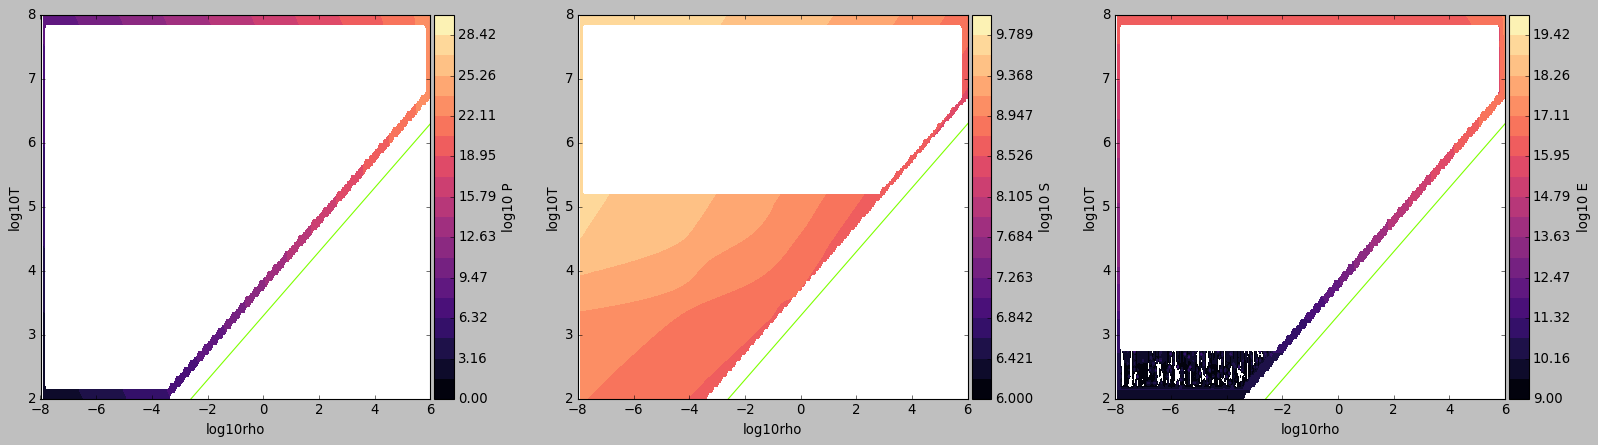

In [75]:
#meos.plot_PSE(perturbed, P_adj,S_adj,E_adj)
meos.plot_PSE(toy, P_adj,S_adj,E_adj)


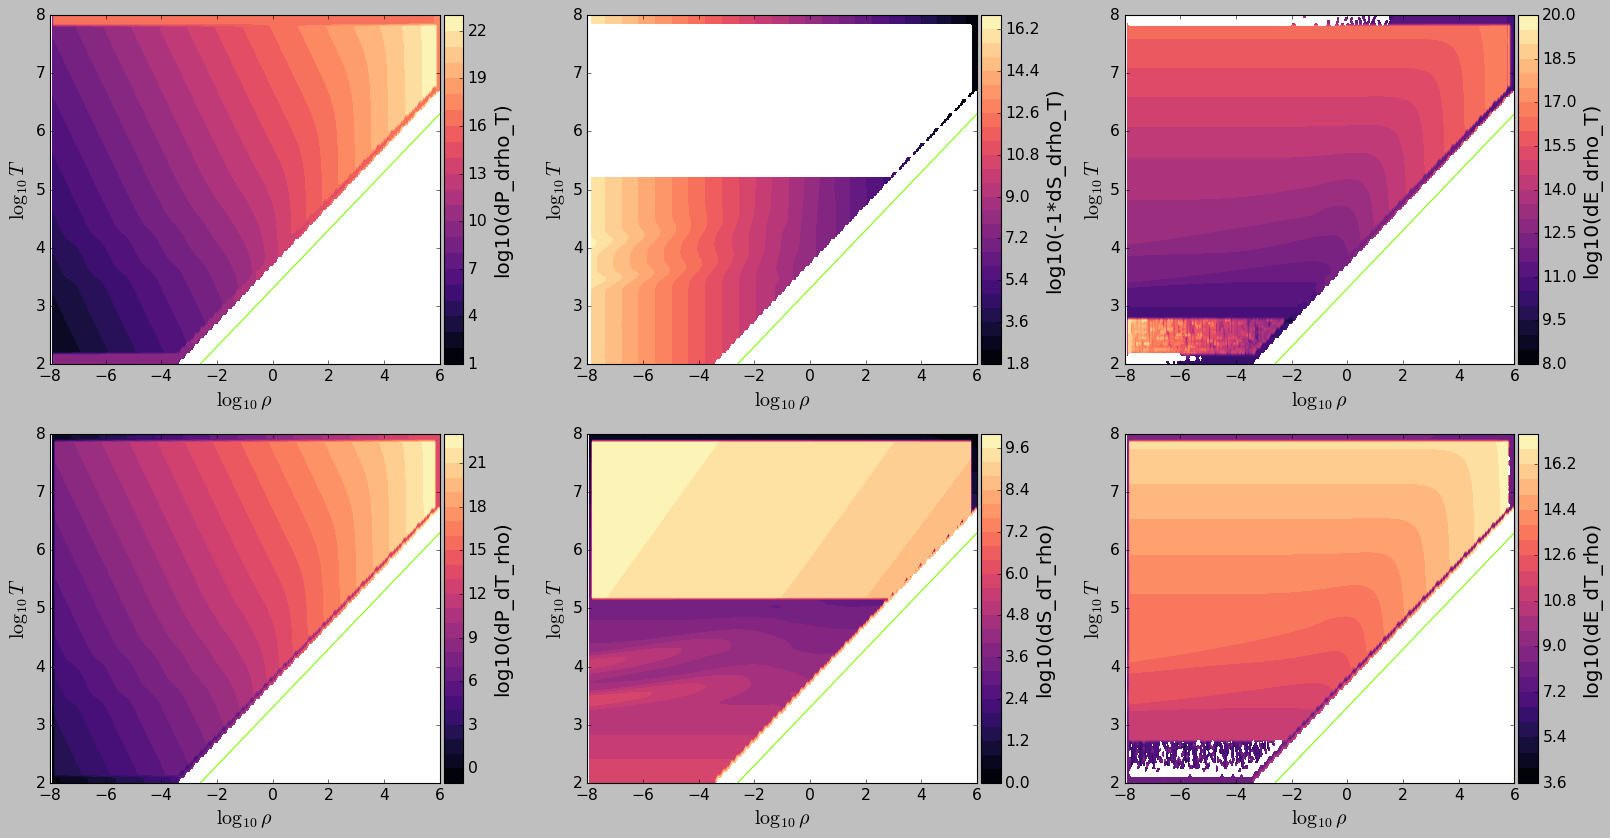

In [76]:
#H_dP_drho_T_1, H_dS_drho_T_1, H_dE_drho_T_1, H_dP_dT_rho_1, H_dS_dT_rho_1, H_dE_dT_rho_1 =  meos.finite_difference(perturbed, P_adj, S_adj, E_adj,
#                                                                                                  species='H', maskUnphysicalRegion=True, plot=True, savename=None)
H_dP_drho_T_1, H_dS_drho_T_1, H_dE_drho_T_1, H_dP_dT_rho_1, H_dS_dT_rho_1, H_dE_dT_rho_1 =  meos.finite_difference(toy, P_adj, S_adj, E_adj,
                                                                                                  species='H', maskUnphysicalRegion=True, plot=True, savename=None)


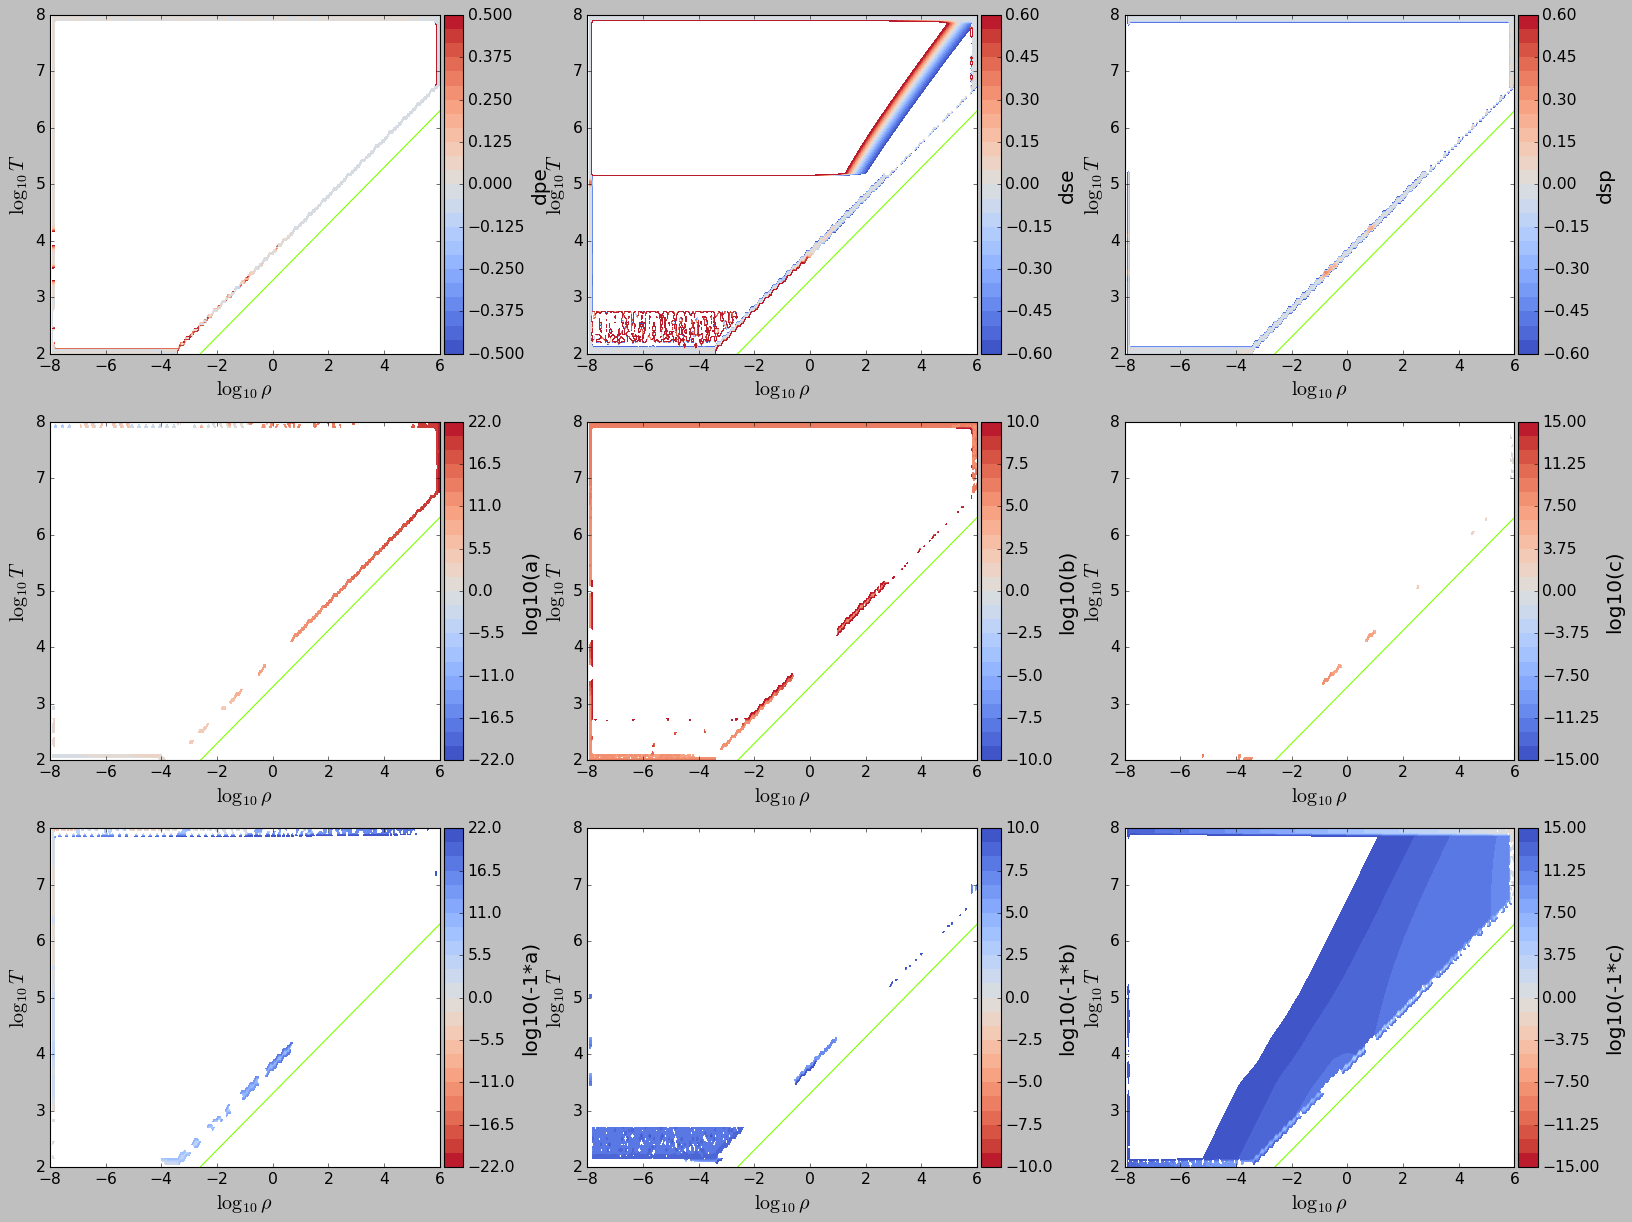

In [77]:
#H_dpe_1, H_dse_1, H_dsp_1, H_a_1, H_b_1, H_c_1 = meos.consistency_metrics(perturbed, P_adj, S_adj, E_adj,H_dP_drho_T_1, H_dS_drho_T_1, H_dE_drho_T_1, H_dP_dT_rho_1, H_dS_dT_rho_1, H_dE_dT_rho_1,species='H',maskUnphysicalRegion=True,plot=True, savename=None)
H_dpe_1, H_dse_1, H_dsp_1, H_a_1, H_b_1, H_c_1 = meos.consistency_metrics(toy, P_adj, S_adj, E_adj,H_dP_drho_T_1, H_dS_drho_T_1, H_dE_drho_T_1, H_dP_dT_rho_1, H_dS_dT_rho_1, H_dE_dT_rho_1,species='H',maskUnphysicalRegion=True,plot=True, savename=None)
